In [1]:
# Necessary Packages

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import itertools

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Data from csv file

root = pd.read_csv('amazing_bank_data.csv')
data = root.copy()

columns_info = pd.read_csv('columns_description.csv')

In [3]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
# More Information about columns

columns_info

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [6]:
len(data.columns)

122

In [7]:
# data['TARGET']

In [8]:
# Checking unique values of target atttributes
data['TARGET'].unique()

array([1, 0], dtype=int64)

In [9]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

###### Checking some values of different attributes

In [10]:
data['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [11]:
data['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [12]:
data['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [13]:
finacial_data = data[['AMT_INCOME_TOTAL' , 'AMT_CREDIT' , 'AMT_ANNUITY']]

In [14]:
finacial_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.5,16524.0,24903.0,34596.0,258025.5


In [15]:
data['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

###### Null Value

In [16]:
data.isnull().sum().sum()

9152465

In [17]:
data.isnull().any()

SK_ID_CURR                      False
TARGET                          False
NAME_CONTRACT_TYPE              False
CODE_GENDER                     False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
CNT_CHILDREN                    False
AMT_INCOME_TOTAL                False
AMT_CREDIT                      False
AMT_ANNUITY                      True
AMT_GOODS_PRICE                  True
NAME_TYPE_SUITE                  True
NAME_INCOME_TYPE                False
NAME_EDUCATION_TYPE             False
NAME_FAMILY_STATUS              False
NAME_HOUSING_TYPE               False
REGION_POPULATION_RELATIVE      False
DAYS_BIRTH                      False
DAYS_EMPLOYED                   False
DAYS_REGISTRATION               False
DAYS_ID_PUBLISH                 False
OWN_CAR_AGE                      True
FLAG_MOBIL                      False
FLAG_EMP_PHONE                  False
FLAG_WORK_PHONE                 False
FLAG_CONT_MOBILE                False
FLAG_PHONE  

In [18]:
null_col = data.isnull().any()

In [19]:
null_col_name = data.columns[null_col]

In [20]:
null_col_name

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [21]:
len(data[null_col_name].columns)

67

In [22]:
null_data = data[null_col_name]

In [23]:
# Making data frame containing columns with null values and percentage of null values
null_per = pd.DataFrame(null_data.isnull().sum()/len(null_data)*100) . reset_index()

In [24]:
null_per

,index,0
0,AMT_ANNUITY,0.003902
1,AMT_GOODS_PRICE,0.090403
2,NAME_TYPE_SUITE,0.420148
3,OWN_CAR_AGE,65.990810
4,OCCUPATION_TYPE,31.345545
5,CNT_FAM_MEMBERS,0.000650
6,EXT_SOURCE_1,56.381073
7,EXT_SOURCE_2,0.214626
8,EXT_SOURCE_3,19.825307
9,APARTMENTS_AVG,50.749729


In [25]:
null_per.columns = ['column_name','null_value_percentage']

In [26]:
null_per.head()

,column_name,null_value_percentage
0,AMT_ANNUITY,0.003902
1,AMT_GOODS_PRICE,0.090403
2,NAME_TYPE_SUITE,0.420148
3,OWN_CAR_AGE,65.990810
4,OCCUPATION_TYPE,31.345545


###### Point Plot for Ckecking the null value percentages

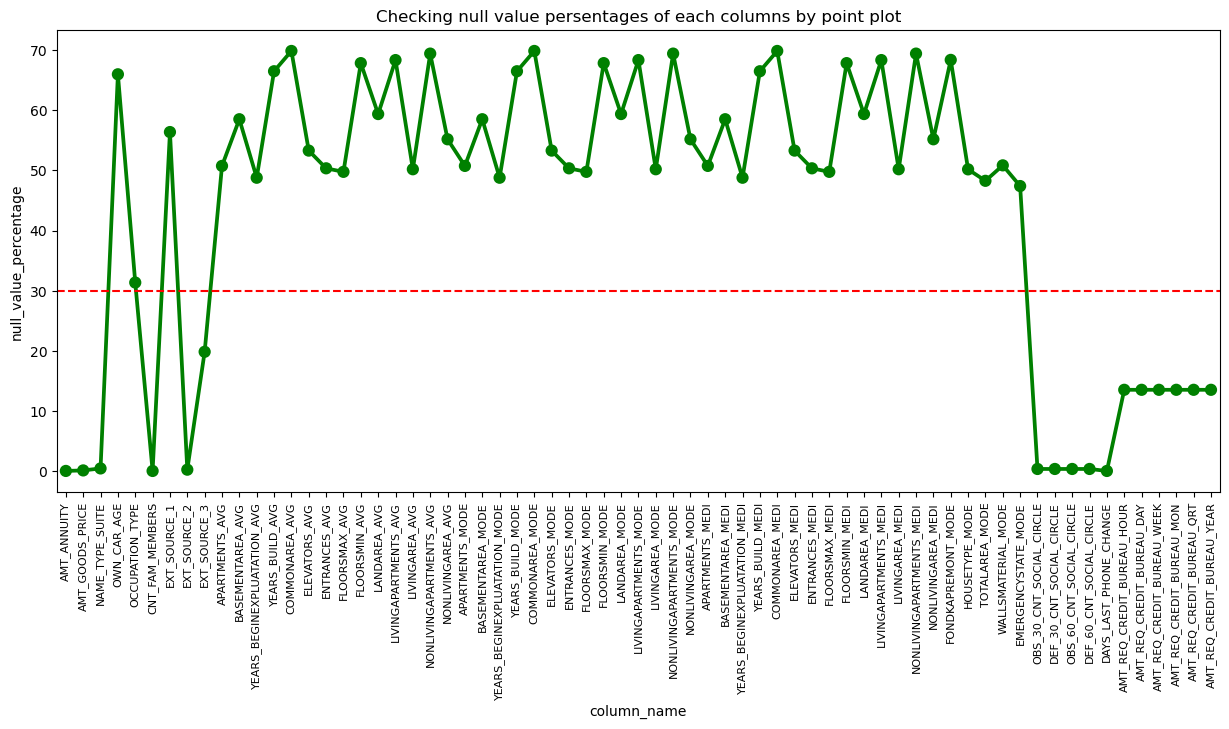

In [27]:

plt.figure(figsize = (15,6))


plot = sns.pointplot(x = 'column_name' , y = 'null_value_percentage' , data = null_per , color = 'green')
plt.title('Checking null value persentages of each columns by point plot')

plt.xticks(rotation = 90 , fontsize = 8)

plot.axhline(30 , ls='--' , color = 'red')

plt.show()

###### Removing columns having greater than 30% null values

In [28]:
null_per_30 = null_per[null_per['null_value_percentage'] >= 30]

In [29]:
rm_col = null_per_30['column_name']

In [30]:
# data[rm_col].head()

In [31]:
data = data.drop(rm_col , axis = 1)

In [32]:
# data.head(10)

In [33]:
len(data.columns)

72

In [34]:
# columns_info

###### Checking relation with target variable

In [35]:
#  EXT_SOURCE

EXT_SOURCE_col_name = ['EXT_SOURCE_2','EXT_SOURCE_3']

exs_df = data[EXT_SOURCE_col_name + ['TARGET']]
   


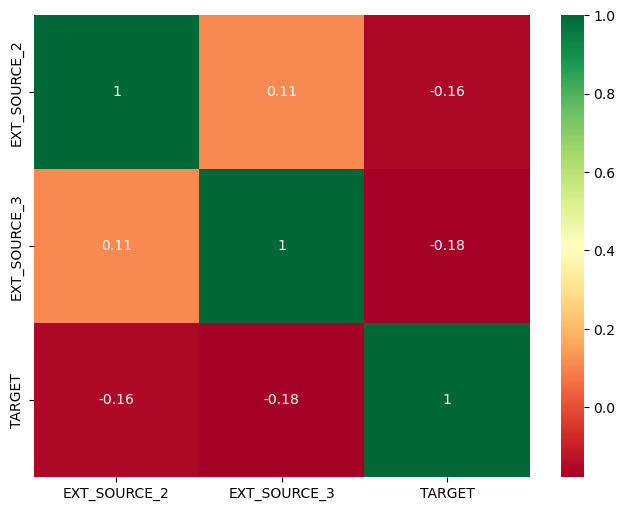

In [36]:
plt.figure(figsize = (8,6))
sns.heatmap(exs_df.corr(),annot = True,cmap ="RdYlGn")
plt.show()

##### Here we can se  that there is no relationship with taget variable , so we can remove these rows

In [37]:
data = data.drop(EXT_SOURCE_col_name , axis = 1)

In [38]:
len(data.columns)

70

In [39]:
flag_Doc_col_name = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
                     'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                     'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                     'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
                     'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

doc_df = data[flag_Doc_col_name + ['TARGET']]

doc_df["TARGET"] = doc_df["TARGET"].replace({1:"Defaulter",0:"Repayer"})


In [40]:
doc_df["TARGET"].head()

0    Defaulter
1      Repayer
2      Repayer
3      Repayer
4      Repayer
Name: TARGET, dtype: object

###### Checking counts of Repayer and Defaulter of binary attributes

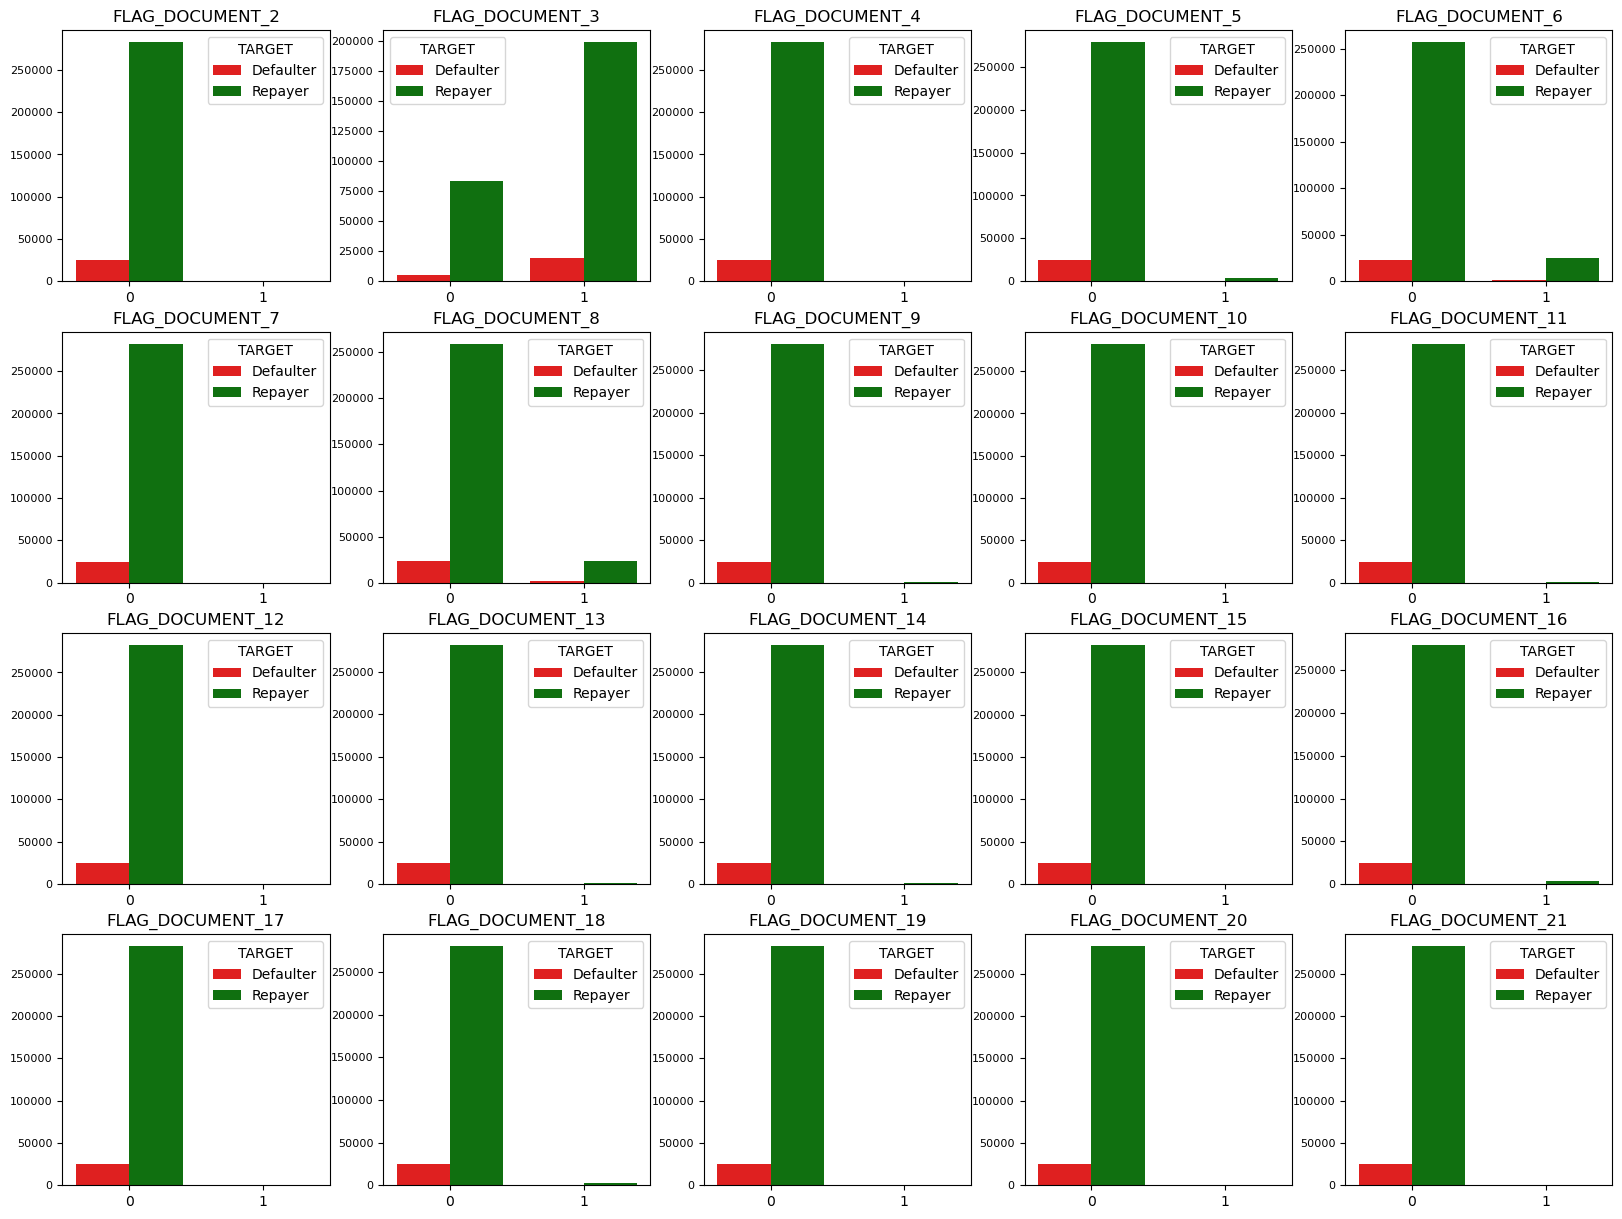

In [41]:
fig = plt.figure(figsize=(20,15))

for i,j in itertools.zip_longest(flag_Doc_col_name,range(len(flag_Doc_col_name))):
    plt.subplot(4,5,j+1)
    ax = sns.countplot(x=doc_df[i],hue=doc_df["TARGET"],palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

#### We can clearly see that all the flag docoments have approx all value are zero, so there is no need of adding these columns for analysis

In [42]:
data = data.drop(flag_Doc_col_name , axis = 1)

In [43]:
len(data.columns)

50

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [45]:
data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Checking relation with target attribute of some uncessary attributes for bank loan|

In [46]:
unnes_col_name = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                  'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                  'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                  'DEF_60_CNT_SOCIAL_CIRCLE']

In [47]:
unnes_df = data[unnes_col_name + ['TARGET']]


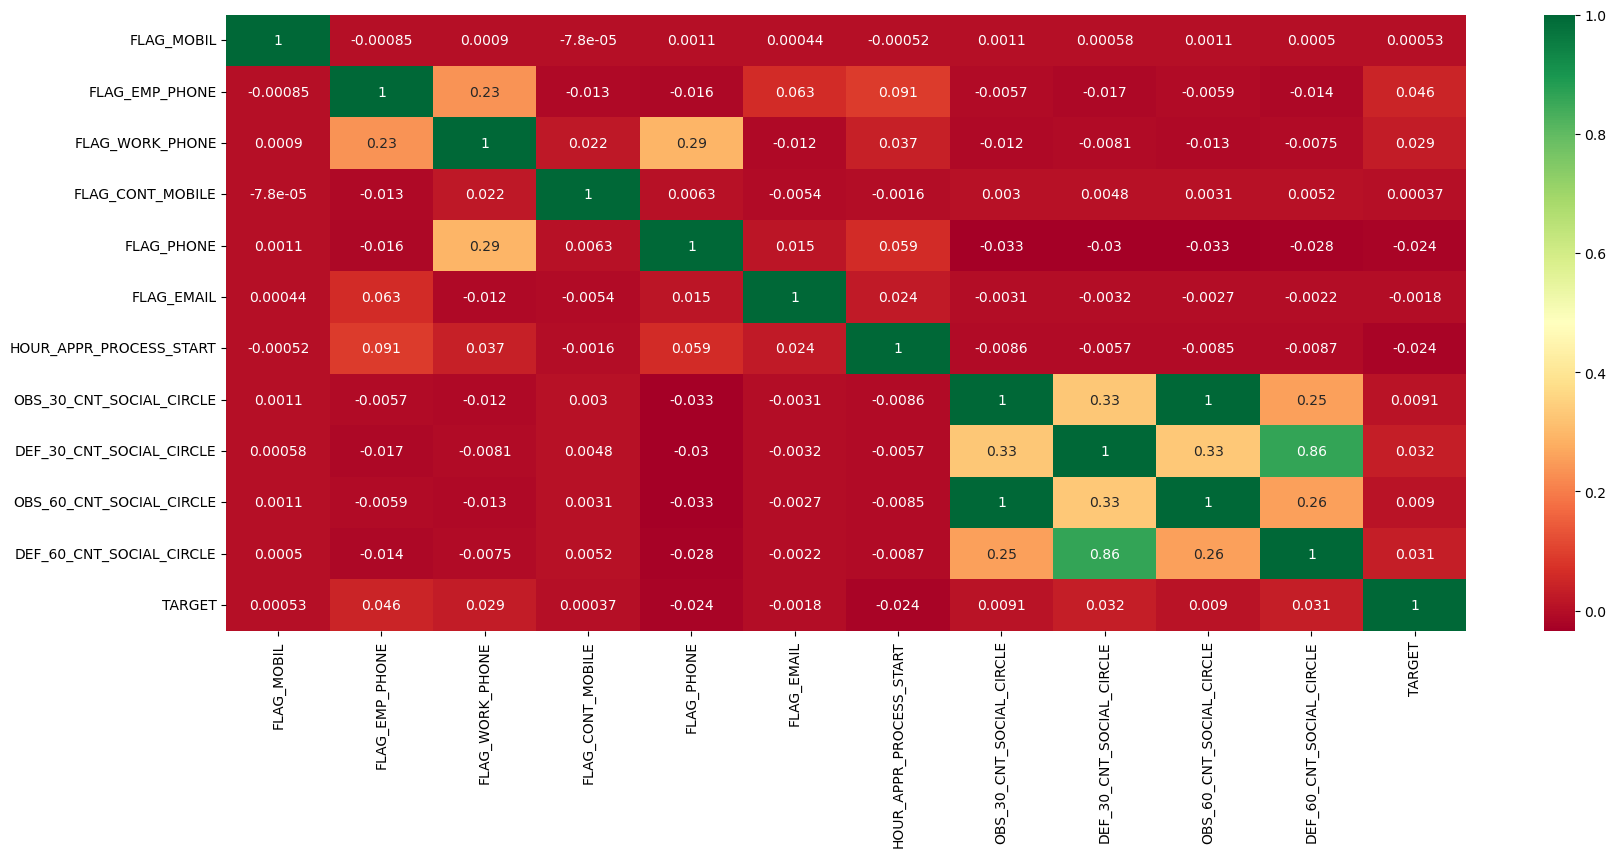

In [48]:
plt.figure(figsize = (20,8))
sns.heatmap(unnes_df.corr(),annot = True,cmap ="RdYlGn")
plt.show()

##### Here we find that all variables have no relation to Target variable , so we can remove them

In [49]:
data = data.drop(unnes_col_name , axis = 1)

In [50]:
len(data.columns)

38

###### Checking AMT_REQ_CREDIT_BUREAU attributes using count plot to chech the Repayer and Defaulters counts

In [51]:
data['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_HOUR', ylabel='count'>

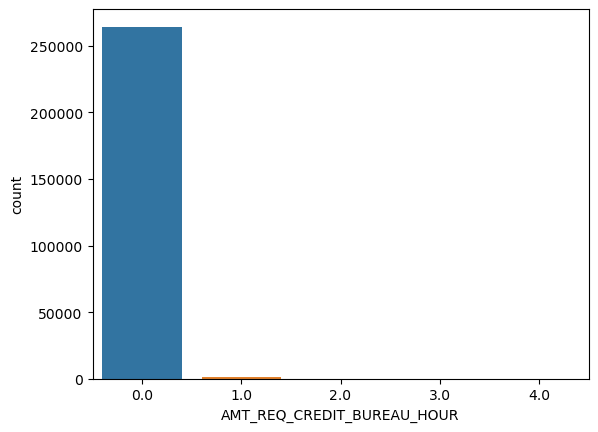

In [52]:
sns.countplot(x=data['AMT_REQ_CREDIT_BUREAU_HOUR'])

In [53]:
data['AMT_REQ_CREDIT_BUREAU_DAY'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  9.,  8.])

In [54]:
data['AMT_REQ_CREDIT_BUREAU_WEEK'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  8.,  7.])

In [55]:
data['AMT_REQ_CREDIT_BUREAU_MON'].unique()

array([ 0., nan,  1.,  2.,  6.,  5.,  3.,  7.,  9.,  4., 11.,  8., 16.,
       12., 14., 10., 13., 17., 24., 19., 15., 23., 18., 27., 22.])

In [56]:
data['AMT_REQ_CREDIT_BUREAU_QRT'].unique()

array([  0.,  nan,   1.,   2.,   4.,   3.,   8.,   5.,   6.,   7., 261.,
        19.])

In [57]:
data['AMT_REQ_CREDIT_BUREAU_YEAR'].unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

In [58]:
bureau_col_name = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                   'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [59]:
bureau_df = data[bureau_col_name + ['TARGET']]

bureau_df["TARGET"] = bureau_df["TARGET"].replace({1:"Defaulter",0:"Repayer"})

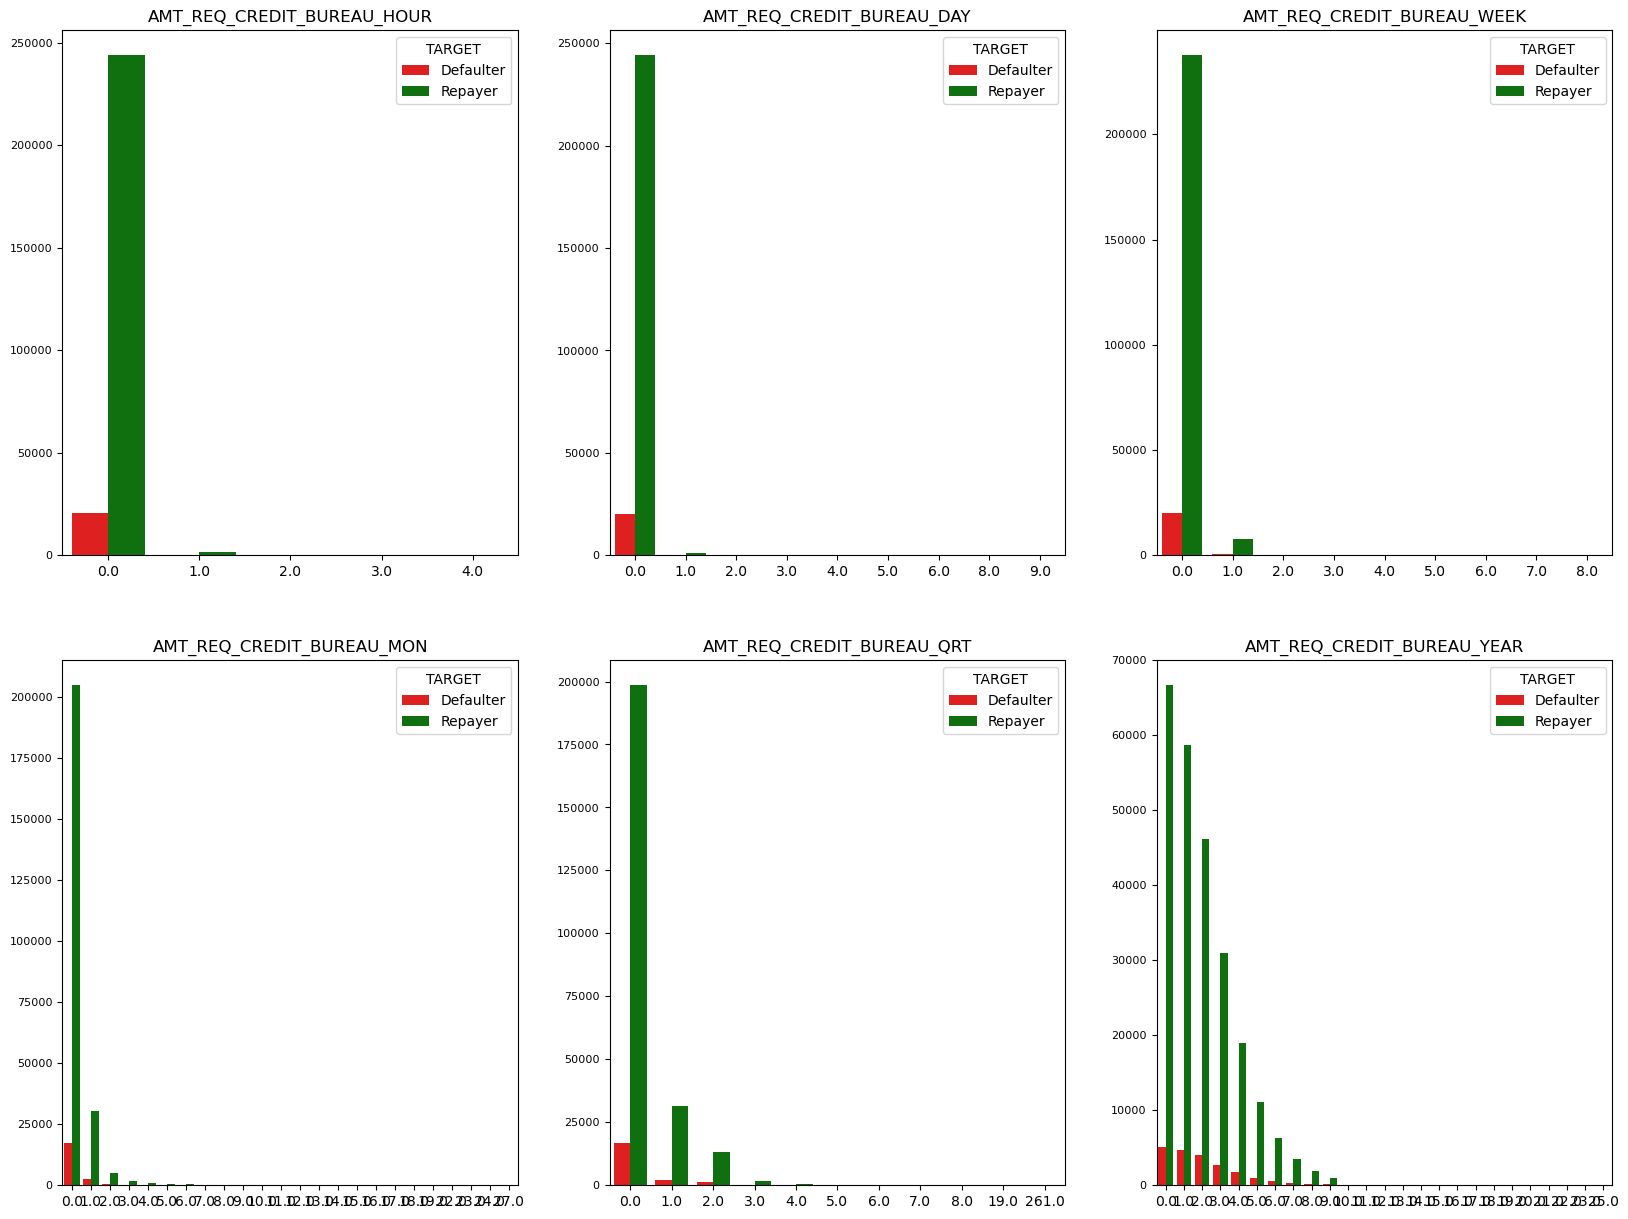

In [60]:
fig = plt.figure(figsize=(20,15))

for i,j in itertools.zip_longest(bureau_col_name,range(len(bureau_col_name))):
    plt.subplot(2,3,j+1)
    ax = sns.countplot(x=bureau_df[i],hue=bureau_df["TARGET"],palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

###### Here we did not get any insight to remove the attributes , so let it be in the data frame

#### So here is the final dataframe foe the analysis after removing the unnecessary columns

In [61]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2.0,1,1,0,0,0,0,0,0,School,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1.0,2,2,0,0,0,0,0,0,Government,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1.0,2,2,0,0,0,0,1,1,Religion,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [63]:
len(data.columns)

38

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

###### Converting -ve days to +ve

In [65]:
days_col_name = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

In [66]:
for col in days_col_name:
    data[col] = abs(data[col])

In [67]:
data[days_col_name].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0


###### Converting Income total to catarories

In [68]:
data['AMT_INCOME_TOTAL'].head()

0    202500.0
1    270000.0
2     67500.0
3    135000.0
4    121500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [69]:
index = [0,1,2,3,4,5,6,7,8,9,10,11]
cata = ['0-100k','100K-200k', '200k-300k','300k-400k',
        '400k-500k','500k-600k','600k-700k','700k-800k',
        '800k-900k','900k-1M', '1M Above']

In [70]:
data['AMT_INCOME_TOTAL'] = data['AMT_INCOME_TOTAL']/100000

data['AMT_INCOME_RANGE']=pd.cut(data['AMT_INCOME_TOTAL'],index,labels=cata)

In [71]:
data['AMT_INCOME_RANGE'].head(10)

0    200k-300k
1    200k-300k
2       0-100k
3    100K-200k
4    100K-200k
5       0-100k
6    100K-200k
7    300k-400k
8    100K-200k
9    100K-200k
Name: AMT_INCOME_RANGE, dtype: category
Categories (11, object): ['0-100k' < '100K-200k' < '200k-300k' < '300k-400k' ... '700k-800k' < '800k-900k' < '900k-1M' < '1M Above']

In [72]:
#data = data.rename(columns={'AMT_INCOME_TOTAL': 'AMT_INCOME_RANGE'})

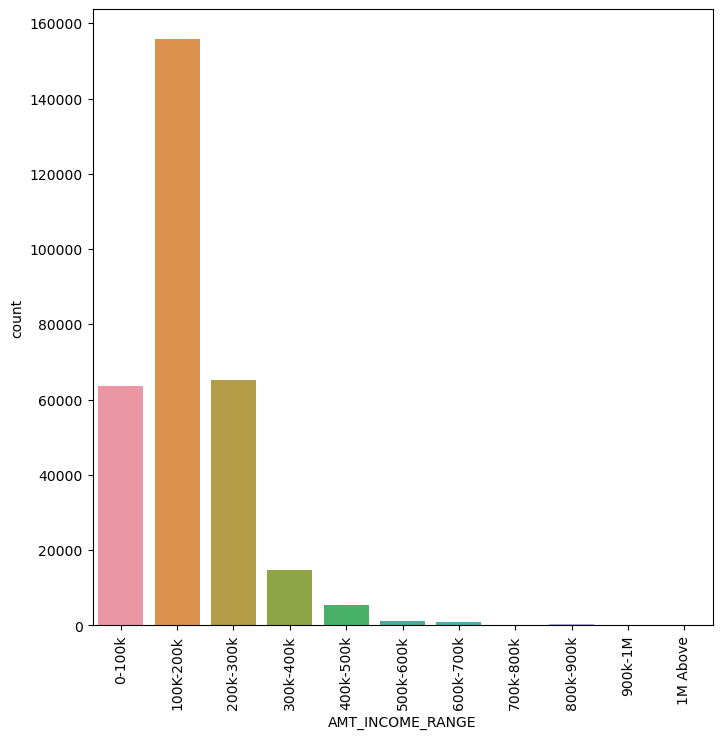

In [73]:
plt.figure(figsize = (8,8))
sns.countplot(x = data['AMT_INCOME_RANGE'])
plt.xticks(rotation = 90)
plt.show()

In [74]:
income_range = data['AMT_INCOME_RANGE'].value_counts()

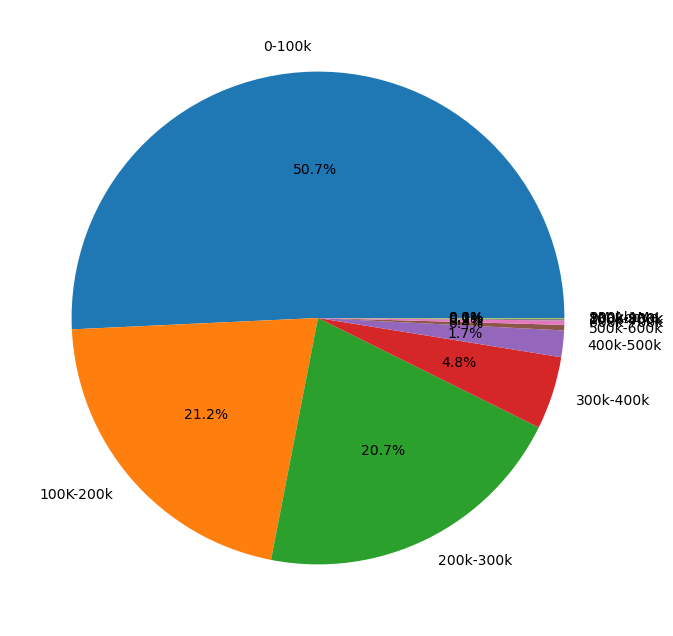

In [75]:
plt.figure(figsize = (8,8))
plt.pie(income_range,labels=cata, autopct='%1.1f%%' )
# plt.xticks(rotation = 90)
plt.show()

###### Here we can see that maximum no of person takes loan whose INCOME_RANGE between (0-300k) and  almost 51% whose INCOME_RANGE between 0-100k.

###### Converting AMT_CREDIT to catarories

In [76]:
data['AMT_CREDIT']=data['AMT_CREDIT']/100000

index = [0,1,2,3,4,5,6,7,8,9,10,100]
cata = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

data['AMT_CREDIT_RANGE']=pd.cut(data['AMT_CREDIT'],bins=index,labels=cata)

In [77]:
credit_range = data['AMT_CREDIT_RANGE'].value_counts(sort = False)
credit_range

0-100K        6004
100K-200K    30140
200k-300k    54813
300k-400k    26338
400k-500k    32038
500k-600k    34232
600k-700k    24049
700k-800k    19193
800k-900k    21792
900k-1M       8927
1M Above     49985
Name: AMT_CREDIT_RANGE, dtype: int64

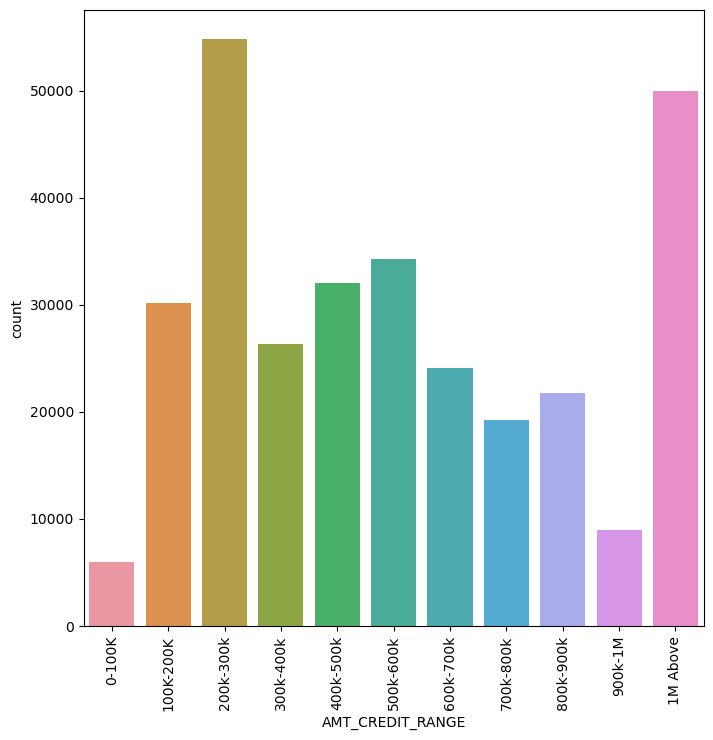

In [78]:
plt.figure(figsize = (8,8))
sns.countplot(x = data['AMT_CREDIT_RANGE'])
plt.xticks(rotation = 90)
plt.show()

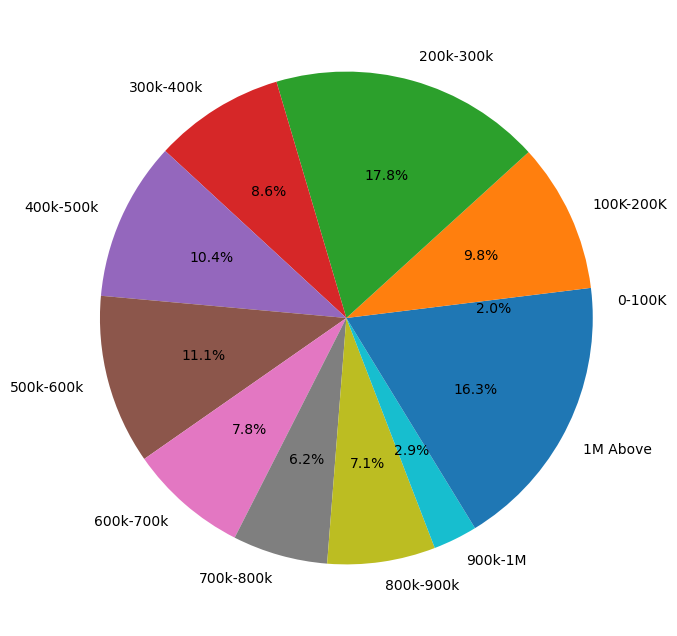

In [79]:
plt.figure(figsize = (8,8))
plt.pie(credit_range,labels=cata, autopct='%1.1f%%' )
plt.show()

###### Converting DAYS_BIRTH to catarories

In [80]:
data['DAYS_BIRTH'].head()

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

In [81]:
data['DAYS_BIRTH'] = round(data['DAYS_BIRTH']/365)

data['DAYS_BIRTH'].head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64

In [82]:
index = [0,20,30,40,50,100]
cata = ['0-20','20-30','30-40','40-50','50 above']

In [83]:
data['AGE_GROUP']=pd.cut(data['DAYS_BIRTH'],index,labels=cata)

In [84]:
data['AGE_GROUP'].head()

0       20-30
1       40-50
2    50 above
3    50 above
4    50 above
Name: AGE_GROUP, dtype: category
Categories (5, object): ['0-20' < '20-30' < '30-40' < '40-50' < '50 above']

In [85]:
# data = data.rename(columns={'DAYS_BIRTH': 'AGE_GROUP'})

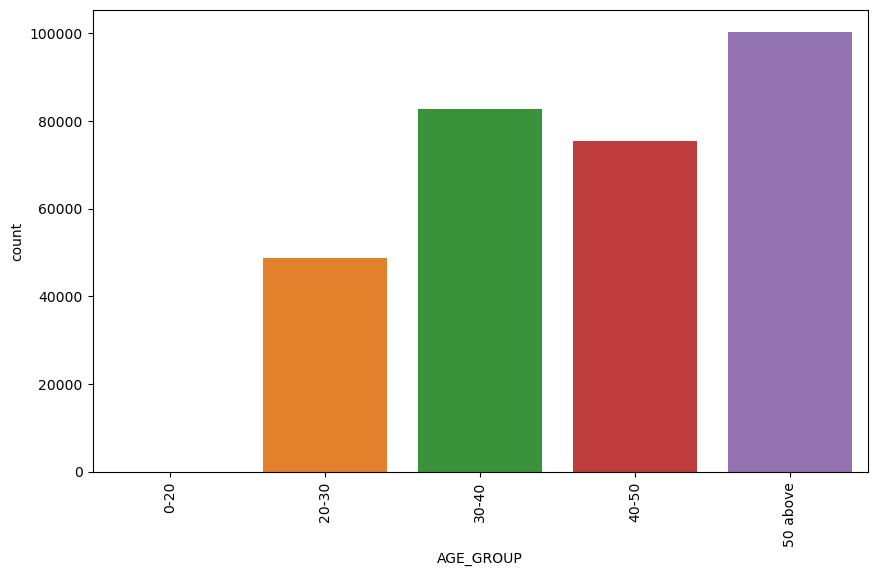

In [86]:
plt.figure(figsize = (10,6))
sns.countplot(x = data['AGE_GROUP'])
plt.xticks(rotation = 90)
plt.show()

In [87]:
age_group = data['AGE_GROUP'].value_counts(sort = False)
age_group

0-20             0
20-30        48869
30-40        82770
40-50        75509
50 above    100363
Name: AGE_GROUP, dtype: int64

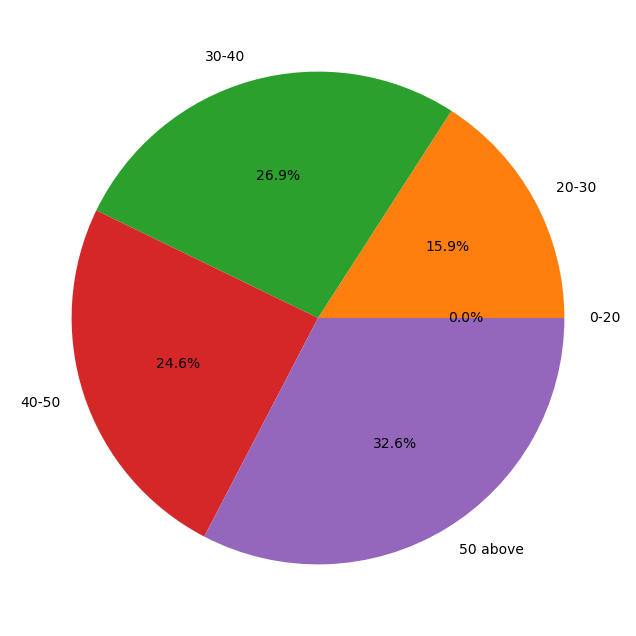

In [88]:
plt.figure(figsize = (8,8))
plt.pie(age_group, autopct='%1.1f%%', labels = cata )
plt.show()

###### Here we can see that approx 68% of people of age between 20-50 takes loan

###### Creating catagories for YEARS_EMPLOYED

In [89]:
# Creating catagories for YEARS_EMPLOYED

data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'] / 365
index = [0,5,10,20,30,40,50,60]
cata = ['0-5','5-10','10-20','20-30','30-40','40-50','50 above']

data['YEARS_EMPLOYED']=pd.cut(data['DAYS_EMPLOYED'],index,labels=cata)

In [90]:
years_emp = data['YEARS_EMPLOYED'].value_counts()
years_emp

0-5         136309
5-10         64872
10-20        38398
20-30         9551
30-40         2771
40-50          234
50 above         0
Name: YEARS_EMPLOYED, dtype: int64

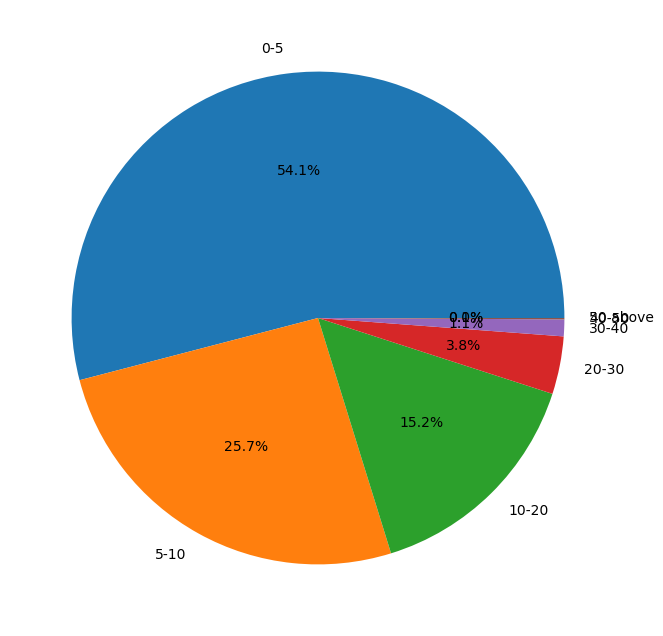

In [91]:
plt.figure(figsize = (8,8))
plt.pie(years_emp, autopct='%1.1f%%', labels = cata )
plt.show()

###### More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less than 10 years of work experience

#### Changing Data Types

In [92]:
# Checking the unique values of each columns to find out the catagorical variables

data.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_LIVE_REGION          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AGE_GROUP                           4
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
YEARS_EMPLOYED                      6
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_INCOME_RANGE                   11
AMT_CREDIT_RANGE                   11
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN

In [93]:
ad = pd.Categorical(data['CODE_GENDER'])

In [94]:
ad

['M', 'F', 'M', 'F', 'M', ..., 'M', 'F', 'F', 'F', 'F']
Length: 307511
Categories (3, object): ['F', 'M', 'XNA']

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [96]:
#Convert Object and Numerical columns to Categorical Columns
cate_col_name = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE',
                 'FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY',
                 'REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']

for i in cate_col_name:
    data[i] =pd.Categorical(data[i])

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

### NULL value Treatment

In [98]:
data.isnull().sum()/len(data)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REG_REGION_NOT_L

In [99]:
data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [100]:
data['NAME_TYPE_SUITE'].fillna(data['NAME_TYPE_SUITE'].mode()[0],inplace=True)

In [101]:
amt = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

data[amt].describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_REQ_CREDIT_BUREAU_HOUR,265992.0,0.006402,0.083849,0.0,0.0,0.0,0.0,4.0
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0
AMT_REQ_CREDIT_BUREAU_YEAR,265992.0,1.899974,1.869295,0.0,0.0,1.0,3.0,25.0


In [102]:
for i in amt:
    data[i].fillna(data[i].median(),inplace = True)

In [103]:
data['YEARS_EMPLOYED'].describe()

count     252135
unique         6
top          0-5
freq      136309
Name: YEARS_EMPLOYED, dtype: object

In [104]:
data['YEARS_EMPLOYED'].fillna(data['YEARS_EMPLOYED'].mode()[0],inplace=True)

In [105]:
numeical = ['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']

In [106]:
for i in numeical:
    data[i].fillna(data[i].mean(),inplace = True)

In [107]:
categorical = ['AMT_INCOME_RANGE','DAYS_LAST_PHONE_CHANGE']

In [108]:
for i in categorical:
    data[i].fillna(data[i].mode()[0],inplace = True)

###### Rechecking for null values

In [109]:
data.isnull().any()

SK_ID_CURR                     False
TARGET                         False
NAME_CONTRACT_TYPE             False
CODE_GENDER                    False
FLAG_OWN_CAR                   False
FLAG_OWN_REALTY                False
CNT_CHILDREN                   False
AMT_INCOME_TOTAL               False
AMT_CREDIT                     False
AMT_ANNUITY                    False
AMT_GOODS_PRICE                False
NAME_TYPE_SUITE                False
NAME_INCOME_TYPE               False
NAME_EDUCATION_TYPE            False
NAME_FAMILY_STATUS             False
NAME_HOUSING_TYPE              False
REGION_POPULATION_RELATIVE     False
DAYS_BIRTH                     False
DAYS_EMPLOYED                  False
DAYS_REGISTRATION              False
DAYS_ID_PUBLISH                False
CNT_FAM_MEMBERS                False
REGION_RATING_CLIENT           False
REGION_RATING_CLIENT_W_CITY    False
REG_REGION_NOT_LIVE_REGION     False
REG_REGION_NOT_WORK_REGION     False
LIVE_REGION_NOT_WORK_REGION    False
R

In [110]:
data.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE_GROUP,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,2.025000,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,1.745205,3648.0,2120,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200k-300k,400k-500k,20-30,0-5
1,100003,0,Cash loans,F,N,N,0,2.700000,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,3.254795,1186.0,291,2.0,1,1,0,0,0,0,0,0,School,828.0,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,40-50,0-5
2,100004,0,Revolving loans,M,Y,Y,0,0.675000,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,0.616438,4260.0,2531,1.0,2,2,0,0,0,0,0,0,Government,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100k,100K-200K,50 above,0-5
3,100006,0,Cash loans,F,N,Y,0,1.350000,3.126825,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,8.326027,9833.0,2437,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,617.0,0.0,0.0,0.0,0.0,0.0,1.0,100K-200k,300k-400k,50 above,5-10
4,100007,0,Cash loans,M,N,Y,0,1.215000,5.130000,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55.0,8.323288,4311.0,3458,1.0,2,2,0,0,0,0,1,1,Religion,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,100K-200k,500k-600k,50 above,5-10
5,100008,0,Cash loans,M,N,Y,0,0.990000,4.904955,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46.0,4.350685,4970.0,477,2.0,2,2,0,0,0,0,0,0,Other,2536.0,0.0,0.0,0.0,0.0,1.0,1.0,0-100k,400k-500k,40-50,0-5
6,100009,0,Cash loans,F,Y,Y,1,1.710000,15.607260,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,38.0,8.575342,1213.0,619,3.0,2,2,0,0,0,0,0,0,Business Entity Type 3,1562.0,0.0,0.0,0.0,1.0,1.0,2.0,100K-200k,1M Above,30-40,5-10
7,100010,0,Cash loans,M,Y,Y,0,3.600000,15.300000,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,52.0,1.230137,4597.0,2379,2.0,3,3,0,0,0,0,1,1,Other,1070.0,0.0,0.0,0.0,0.0,0.0,0.0,300k-400k,1M Above,50 above,0-5
8,100011,0,Cash loans,F,N,Y,0,1.125000,10.196100,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,55.0,1000.665753,7427.0,3514,2.0,2,2,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100K-200k,1M Above,50 above,0-5
9,100012,0,Revolving loans,M,N,Y,0,1.350000,4.050000,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,40.0,5.531507,14437.0,3992,1.0,2,2,0,0,0,0,0,0,Electricity,1673.0,0.0,0.0,0.0,0.0,0.0,1.0,100K-200k,400k-500k,30-40,5-10


####  Identifying the outliers

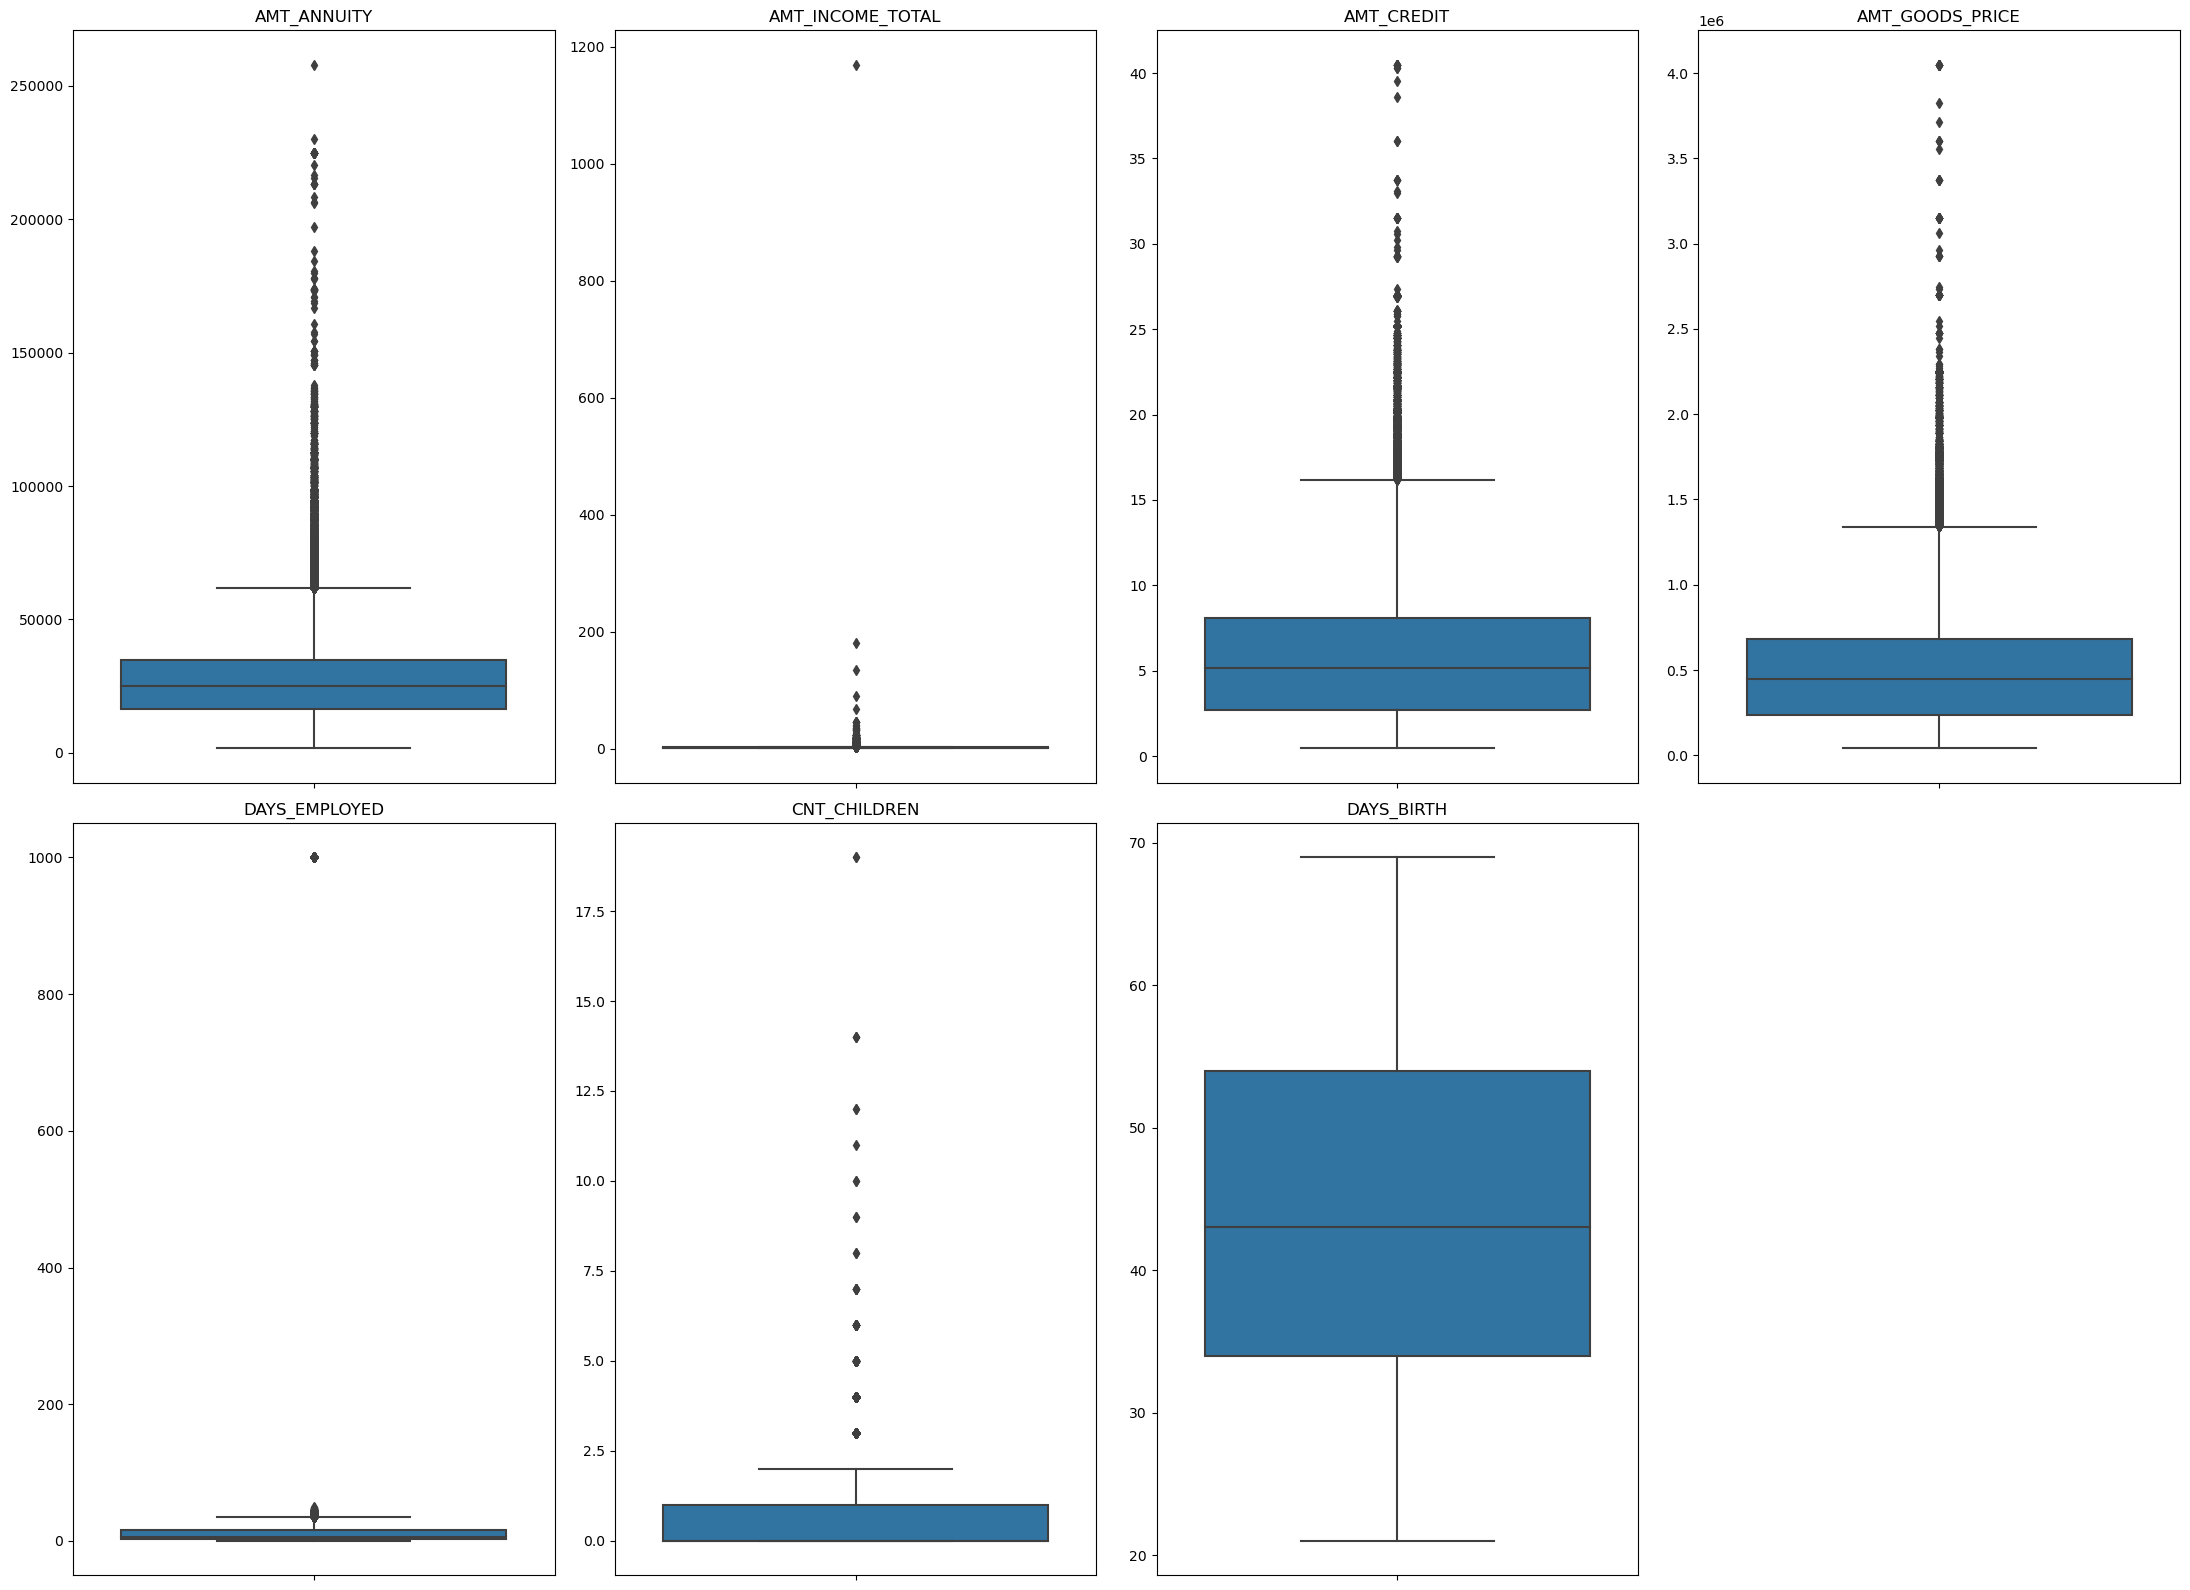

In [111]:
plt.figure(figsize=(22, 16))

outlier_col = ['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
               'DAYS_EMPLOYED', 'CNT_CHILDREN', 'DAYS_BIRTH']

for i, j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(2, 4, j + 1)
    sns.boxplot(y=data[i])
    plt.title(i)
    plt.ylabel("")

plt.tight_layout()
plt.show()

###### Based on the current application data, it is evident that there are outliers present in the variables AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, and CNT_CHILDREN. Additionally, there is a significant number of outliers in the variable AMT_INCOME_TOTAL, indicating that some loan applicants have considerably higher incomes compared to others.

###### Fortunately, the variable DAYS_BIRTH does not contain any outliers, indicating that the available data for this variable is reliable.

###### However, the variable DAYS_EMPLOYED does exhibit outlier values around 350,000 days, which is equivalent to approximately 958 years. Such entries are clearly incorrect and must be erroneous.

##### Data Imbalancing

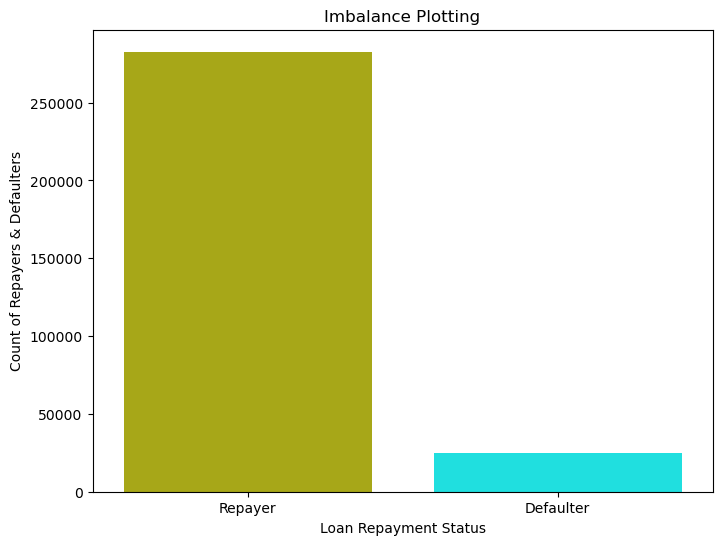

In [112]:
imbalance = data["TARGET"].value_counts().reset_index()

plt.figure(figsize=(8, 6))
x = ['Repayer','Defaulter']
y = imbalance["TARGET"]
sns.barplot(x=x, y=y, palette=['y', 'cyan'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

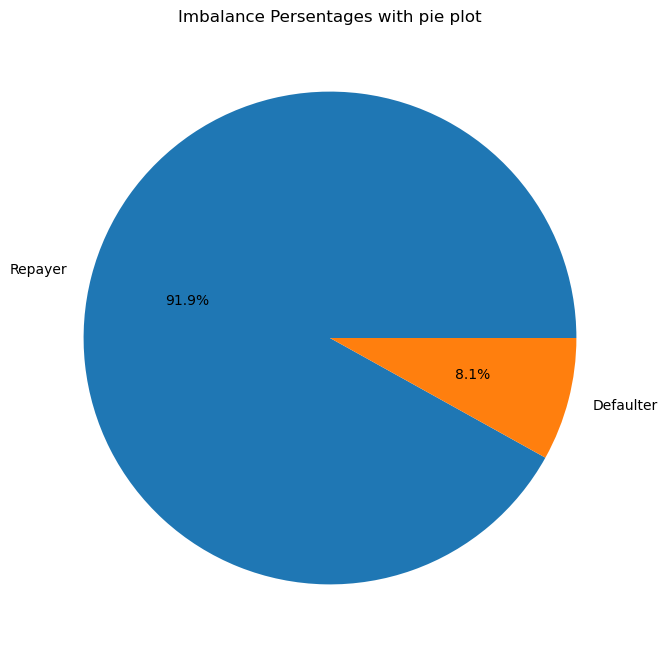

In [113]:
plt.figure(figsize = (8,8))
plt.pie(y , labels = x , autopct='%1.1f%%')
plt.title("Imbalance Persentages with pie plot")
plt.show()

###### Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.9 and 8.1

### Creating function for plots to check the counts of Repayer and Defaulter , and Percentages of Defaulters among all catagories of the attribute

In [114]:


def ana_plot(col_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6), facecolor = 'lightgray')
    ax1.set_facecolor(color="#FAF0E4")
    ax2.set_facecolor(color="#ECF8F9")
    
    
    df = data[[col_name,'TARGET']]
    
    def_df = df[df['TARGET']==1]
    def_df_vc = def_df[col_name].value_counts(sort = False).reset_index()
    def_df_vc.columns = [col_name,'Value']
    
    
    sns.countplot(ax = ax1 ,x=col_name,data=df,hue="TARGET" , palette = ['Indigo','Maroon'])
    ax1.legend(['Repayer', 'Defaulter'])
    ax1.set_title('Counts of Repayer and Defaulter of : '+ col_name , color = '#2D033B')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    

    plt.pie(def_df_vc['Value'] , labels=def_df_vc[col_name], autopct='%1.0f%%',rotatelabels = True,
            wedgeprops={'linewidth': 0.7, 'edgecolor': 'white'})
    ax2.set_title('Defaulter % of : '+col_name , color = '#D21312')

    plt.show()

#### Checking plot result by calculating manually.

In [115]:
    df = data[['CODE_GENDER','TARGET']]
    
    def_df = df[df['TARGET']==1]
    def_df_vc = def_df['CODE_GENDER'].value_counts(sort = False).reset_index()
    def_df_vc.columns = ['CODE_GENDER','Value']
    
    df1 = df[df['CODE_GENDER']=='F']
    
    df1['TARGET'].value_counts()

0    188278
1     14170
Name: TARGET, dtype: int64

In [116]:
    df = data[['CODE_GENDER','TARGET']]
    
    def_df = df[df['TARGET']==1]
    def_df_vc = def_df['CODE_GENDER'].value_counts(sort = False).reset_index()
    def_df_vc.columns = ['CODE_GENDER','Value']
    
    df1 = df[df['CODE_GENDER']=='M']
    
    df1['TARGET'].value_counts()

0    94404
1    10655
Name: TARGET, dtype: int64

In [117]:
def_df_vc

,CODE_GENDER,Value
0,F,14170
1,M,10655
2,XNA,0


In [118]:
round(def_df['CODE_GENDER'].value_counts()/len(def_df)*100)

F      57.0
M      43.0
XNA     0.0
Name: CODE_GENDER, dtype: float64

### Count plot for Counts of Repayer and Dafaulter of all categories And Pie plot to show the Default Persentages.

#### CODE_GENDER

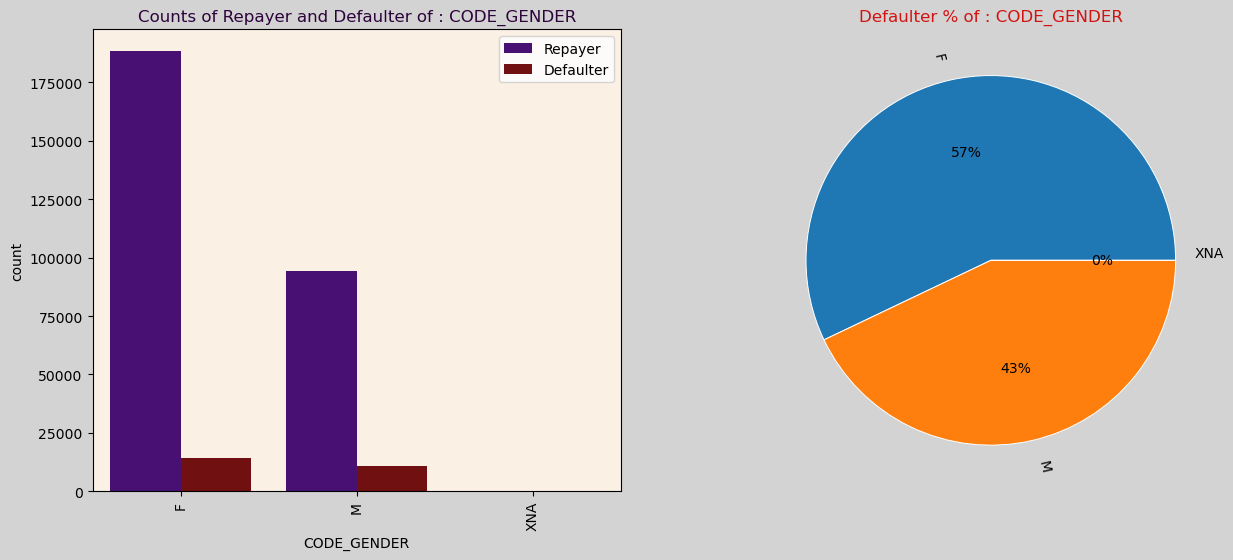

In [119]:
ana_plot('CODE_GENDER')

###### We can see from the graph Female takes more loans and also they have higher percentages of default rate than Men.

#### AGE_GROUP

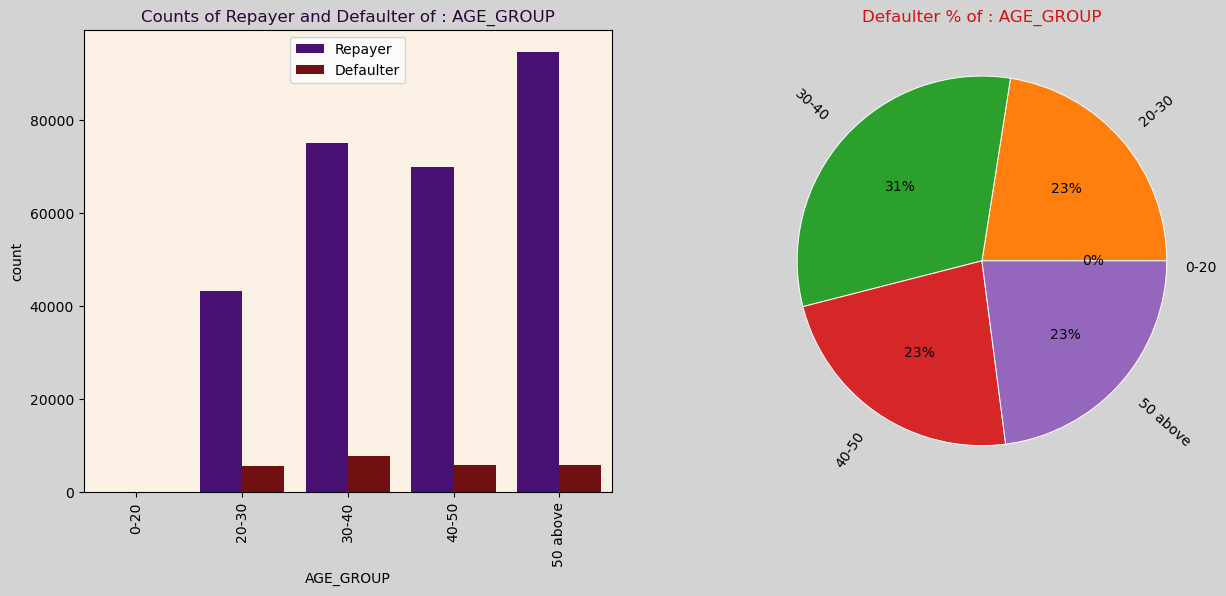

In [120]:
ana_plot('AGE_GROUP')

###### Between age 0 to 20 takes no loan, The highest amount of default rate are made by the age group 30-40, 
###### The age group above 50 have very less default rate that is 23% , 
###### Wecan clearly see that approx 67% of default are comes from age between 20-50.

#### YEARS_EMPLOYED

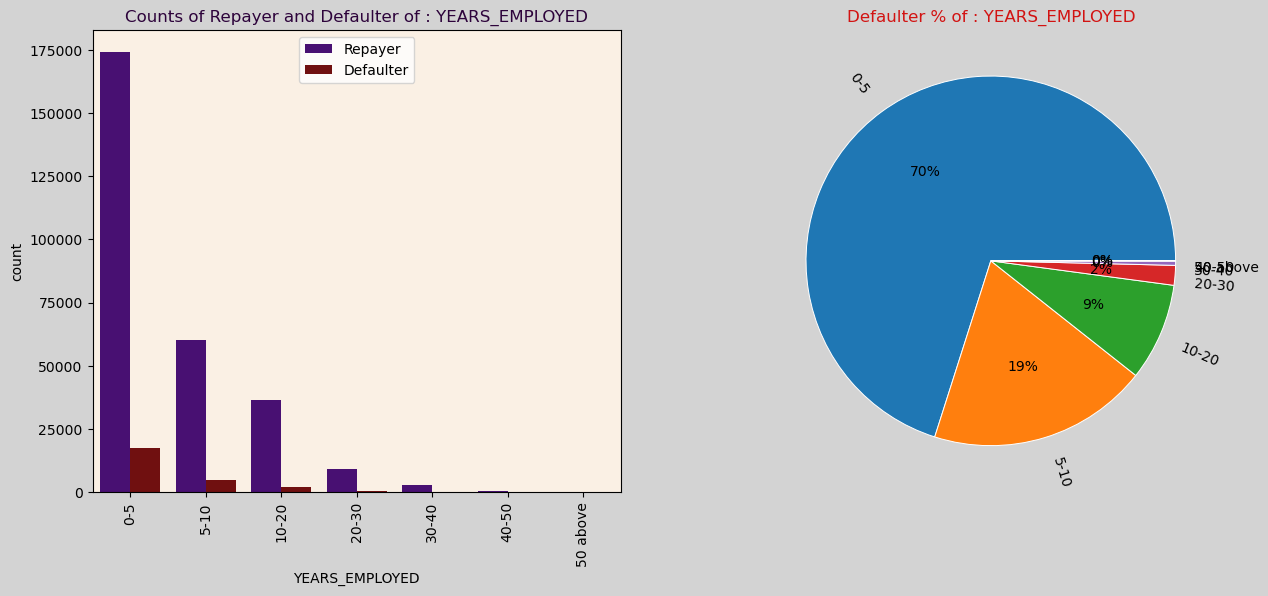

In [121]:
ana_plot('YEARS_EMPLOYED')

###### We can say that there is a decreasing order of taking loans with increasing years of job experience.
###### And 0 to 5 years of experience have higher default rate that is 70%

#### AMT_INCOME_RANGE

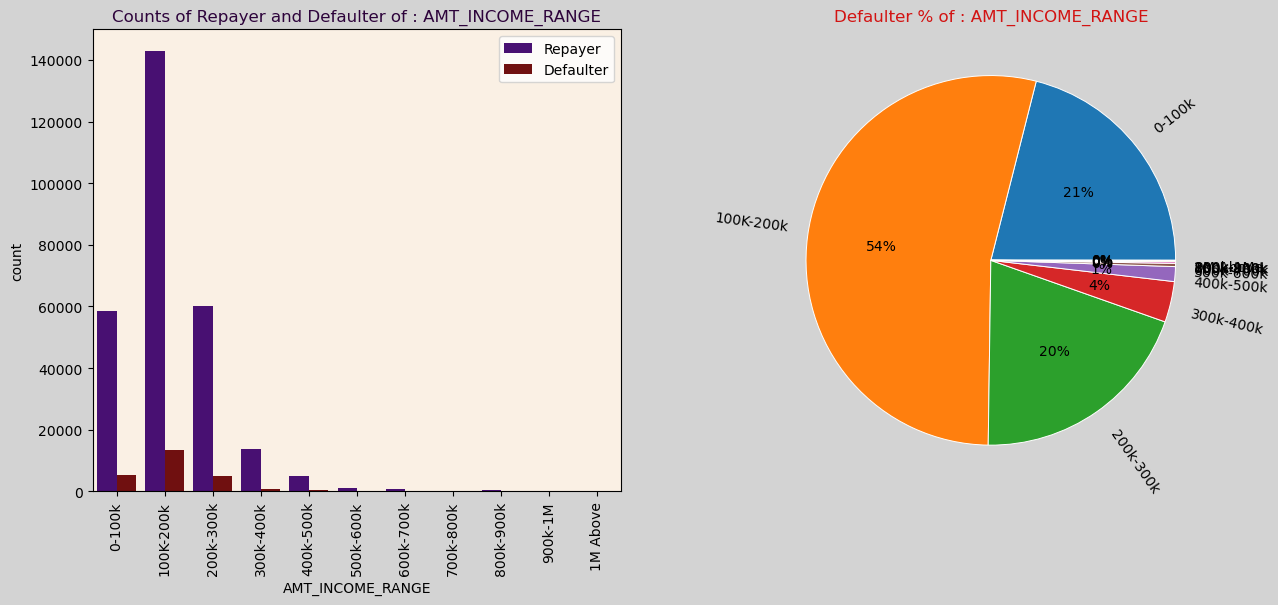

In [122]:
ana_plot('AMT_INCOME_RANGE')

###### Persons having 100k to 200k takes more loans and also higher default rate

#### AMT_CREDIT_RANGE

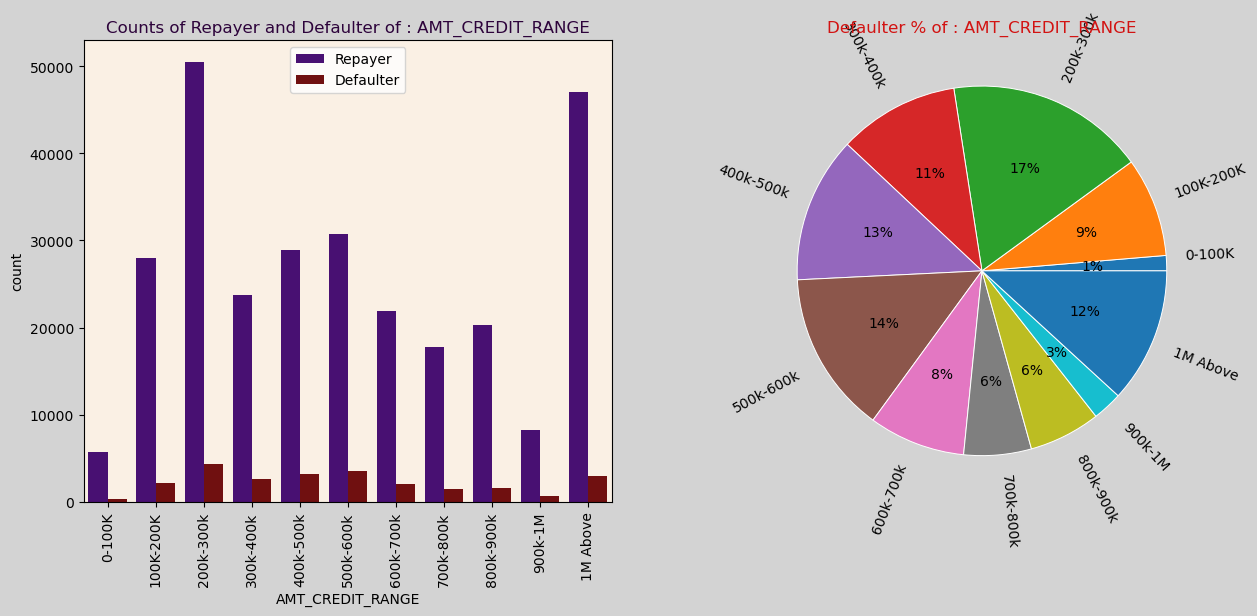

In [123]:
ana_plot('AMT_CREDIT_RANGE')

###### Credit range between 200k to 300 k have higher default rate also takes more loans compare to other

#### ORGANIZATION_TYPE

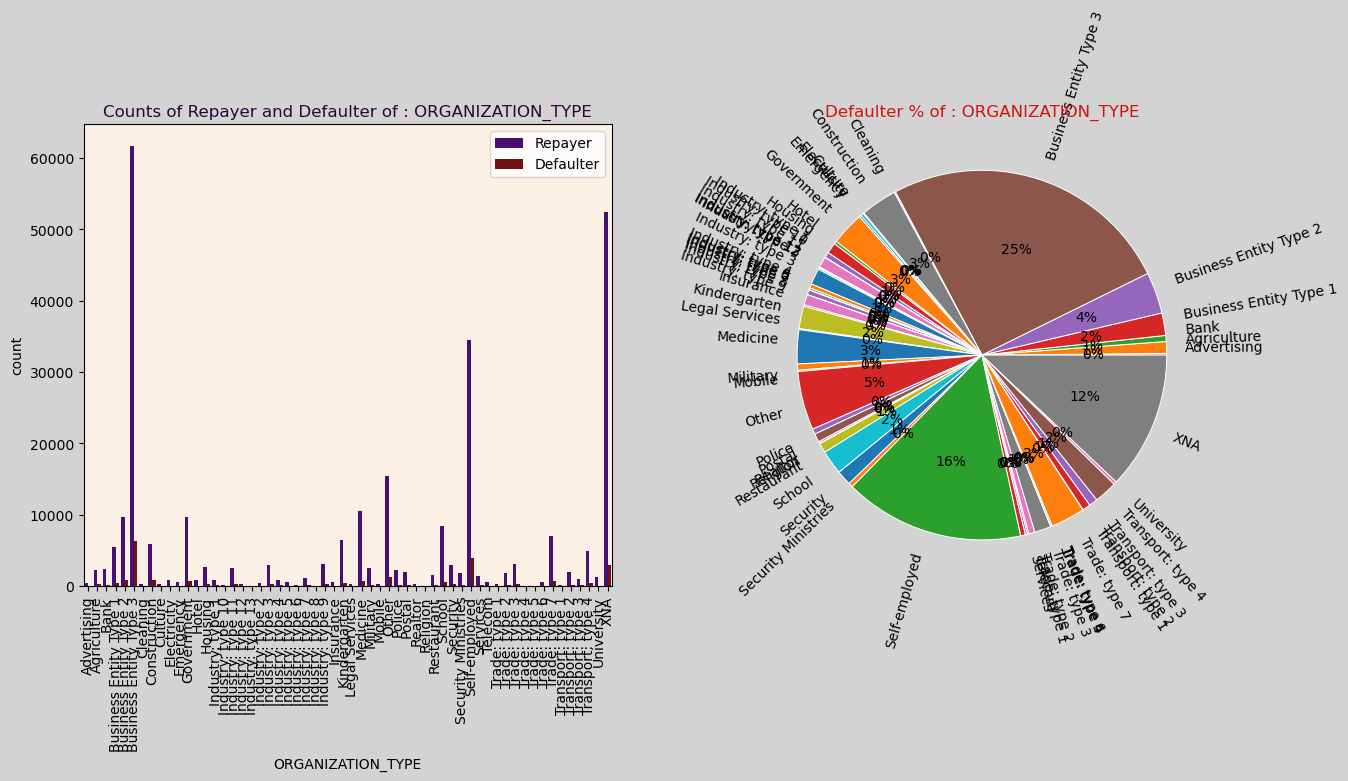

In [124]:
ana_plot('ORGANIZATION_TYPE')

###### Business Entity type 3 have more defaulters folled by self-employed

#### NAME_INCOME_TYPE

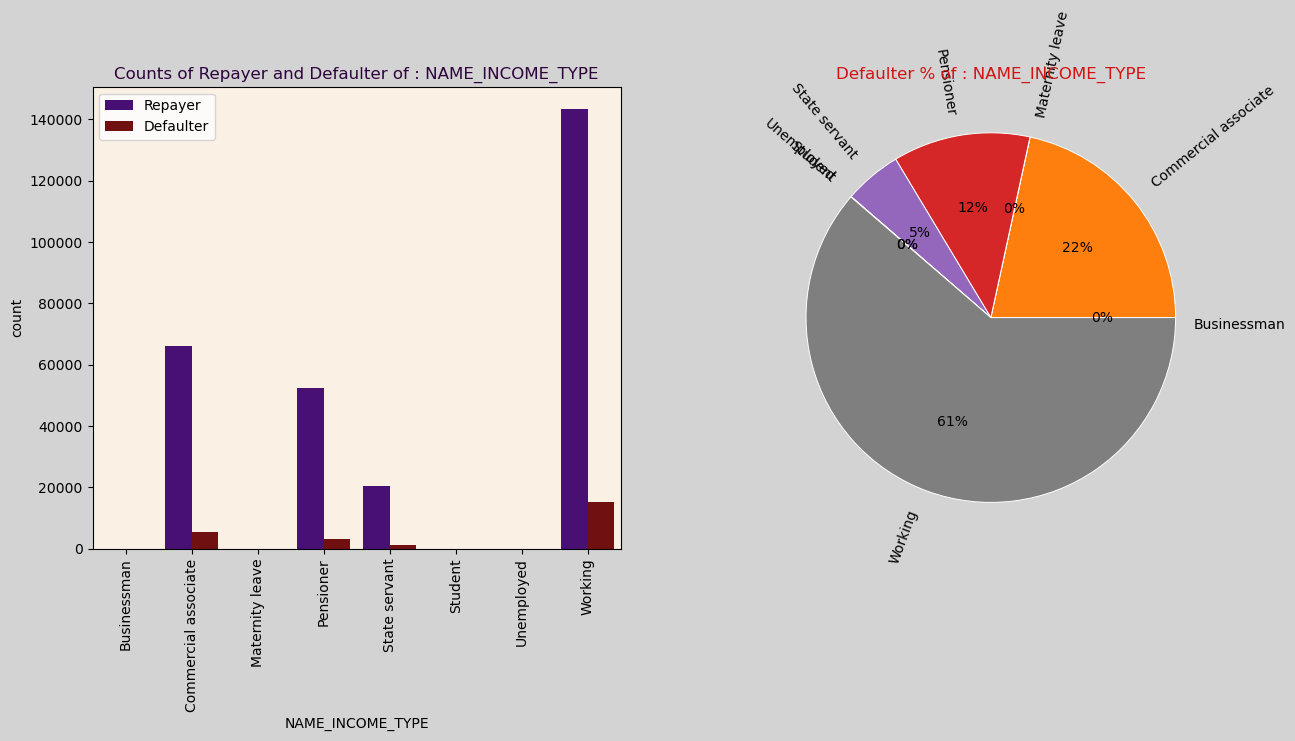

In [125]:
ana_plot('NAME_INCOME_TYPE')

#### NAME_EDUCATION_TYPE

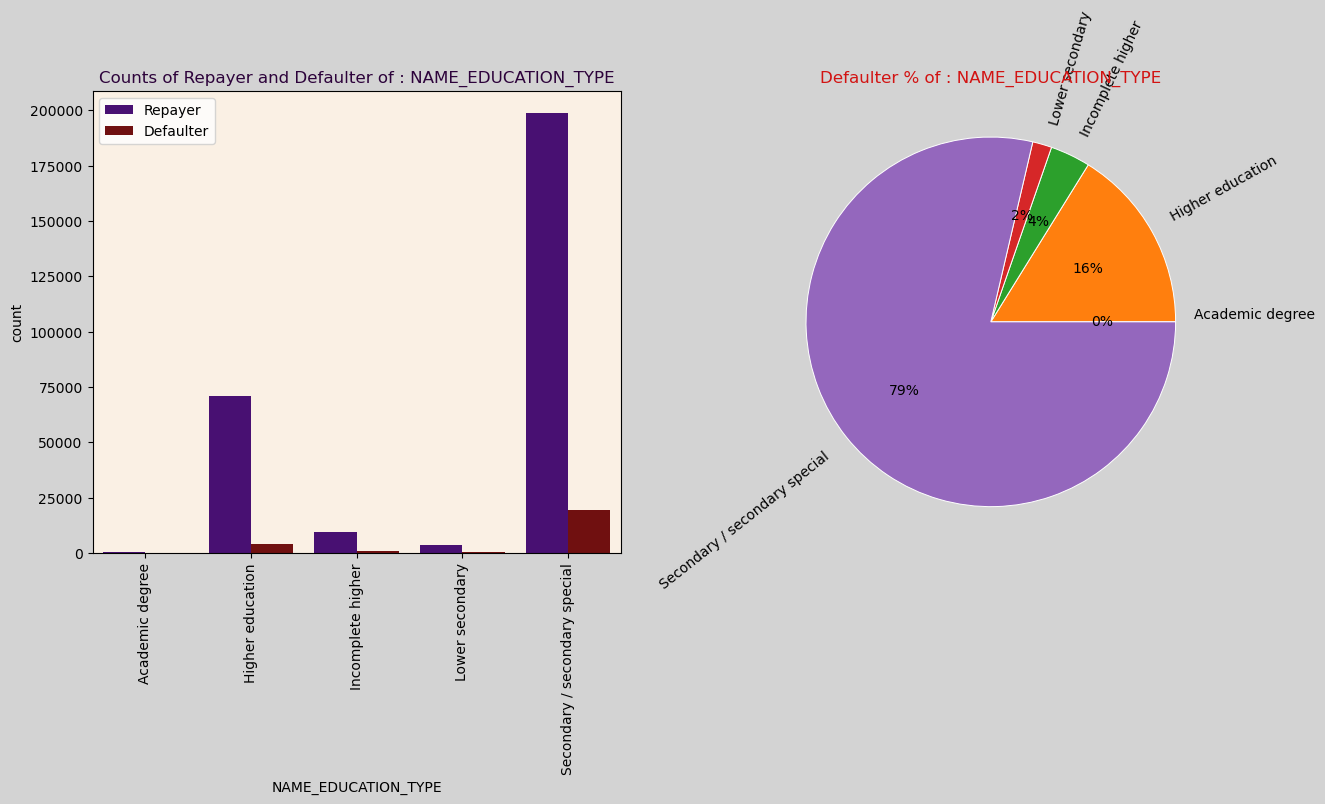

In [126]:
ana_plot('NAME_EDUCATION_TYPE')

###### Persons under Secondary or secondary special takes more loas and have highest default rate i.e 79%

#### NAME_HOUSING_TYPE

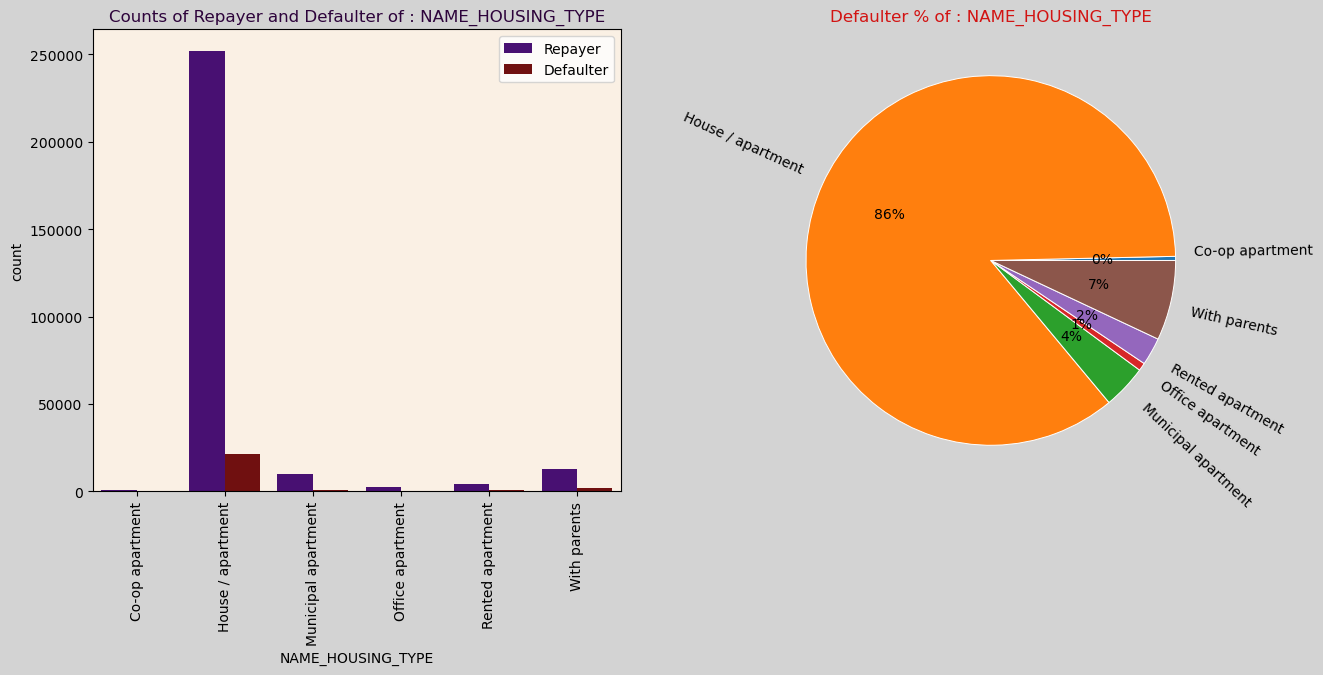

In [127]:
ana_plot('NAME_HOUSING_TYPE')

###### Persons having house type House\Apartment takes more loan and their default rate is 86%

#### NAME_CONTRACT_TYPE

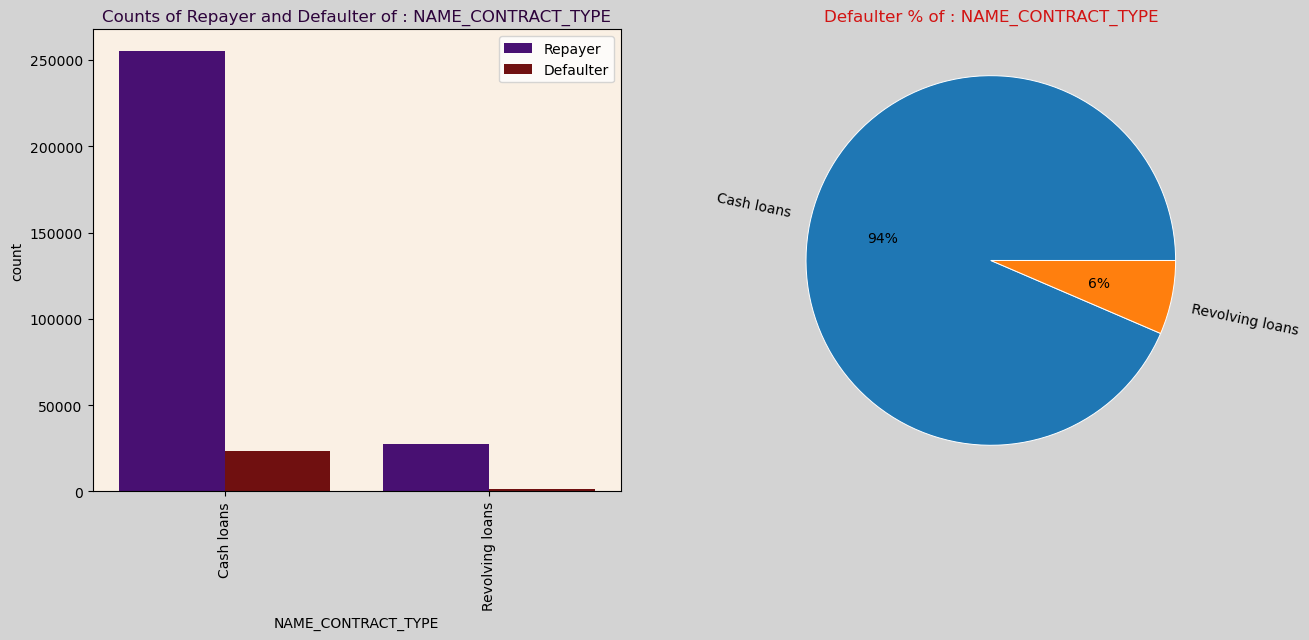

In [128]:
ana_plot('NAME_CONTRACT_TYPE')

###### It was clear that cash loan category have 94% default rate 

#### FLAG_OWN_REALTY

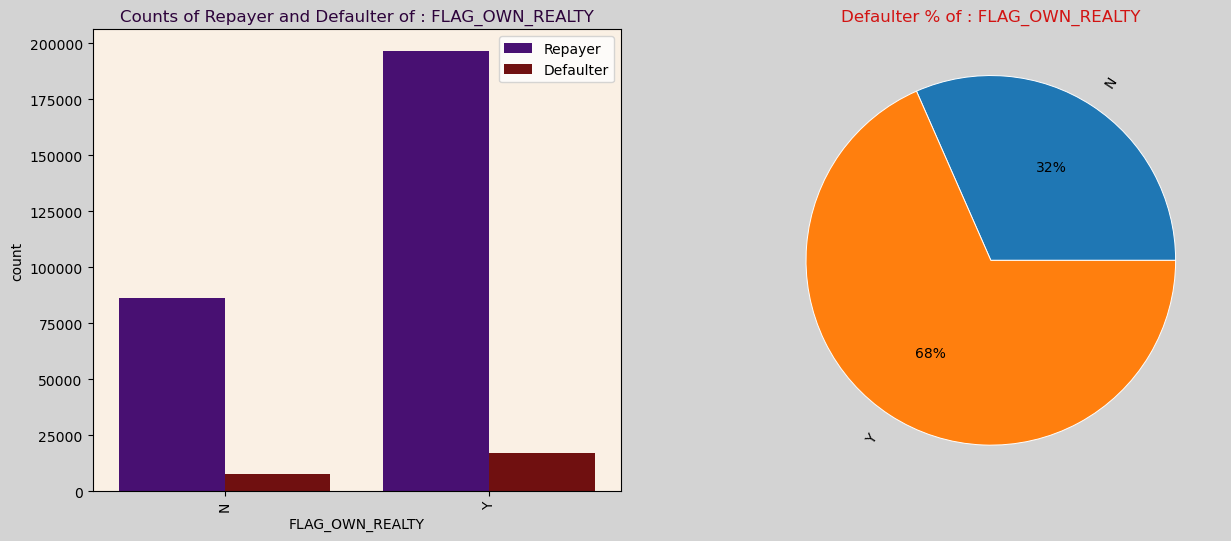

In [129]:
ana_plot('FLAG_OWN_REALTY')

#### FLAG_OWN_CAR

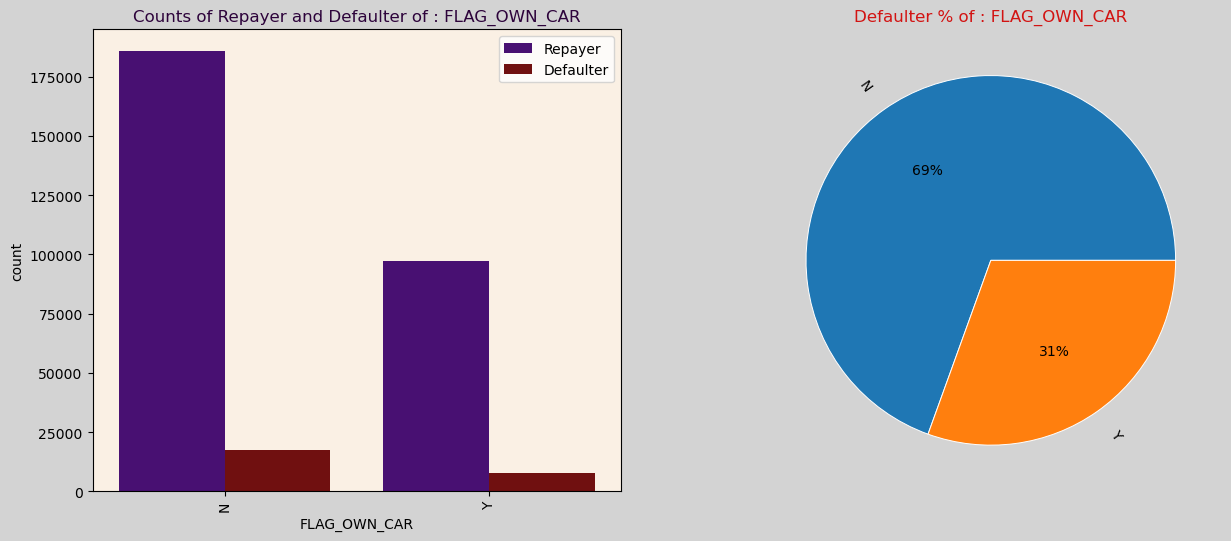

In [130]:
ana_plot('FLAG_OWN_CAR')

#### NAME_FAMILY_STATUS

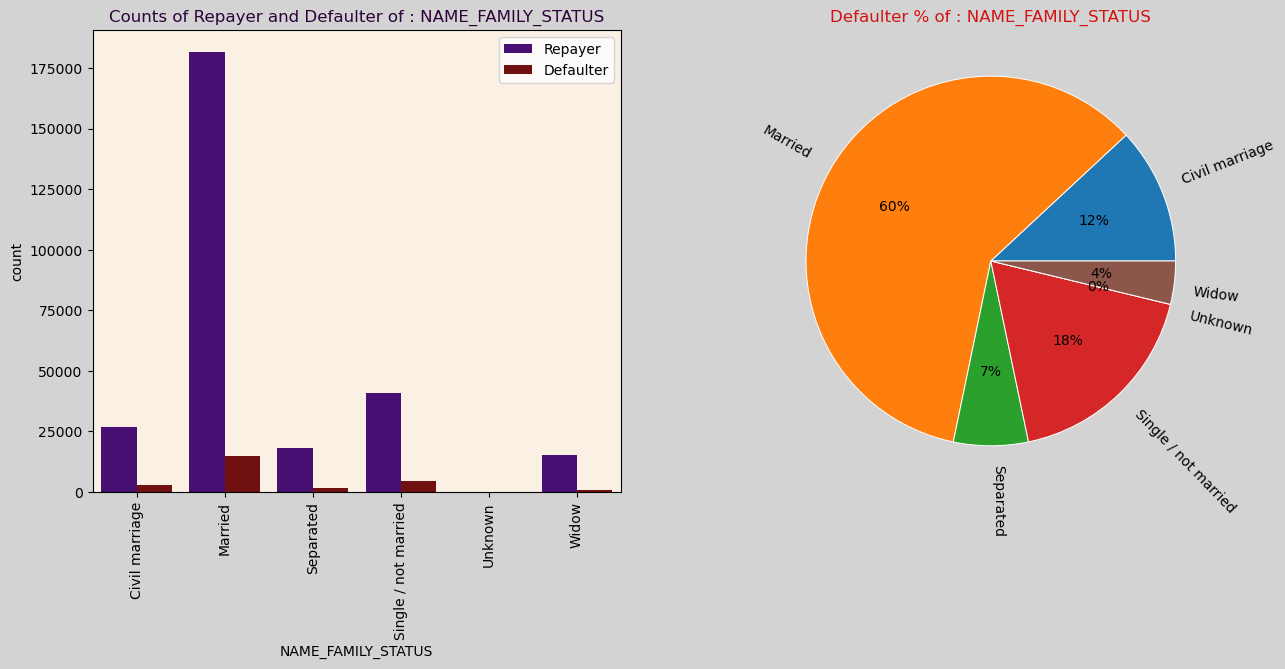

In [131]:
ana_plot('NAME_FAMILY_STATUS')

###### Married persons takes more loan and have highest default rate of 60%

#### CNT_FAM_MEMBERS

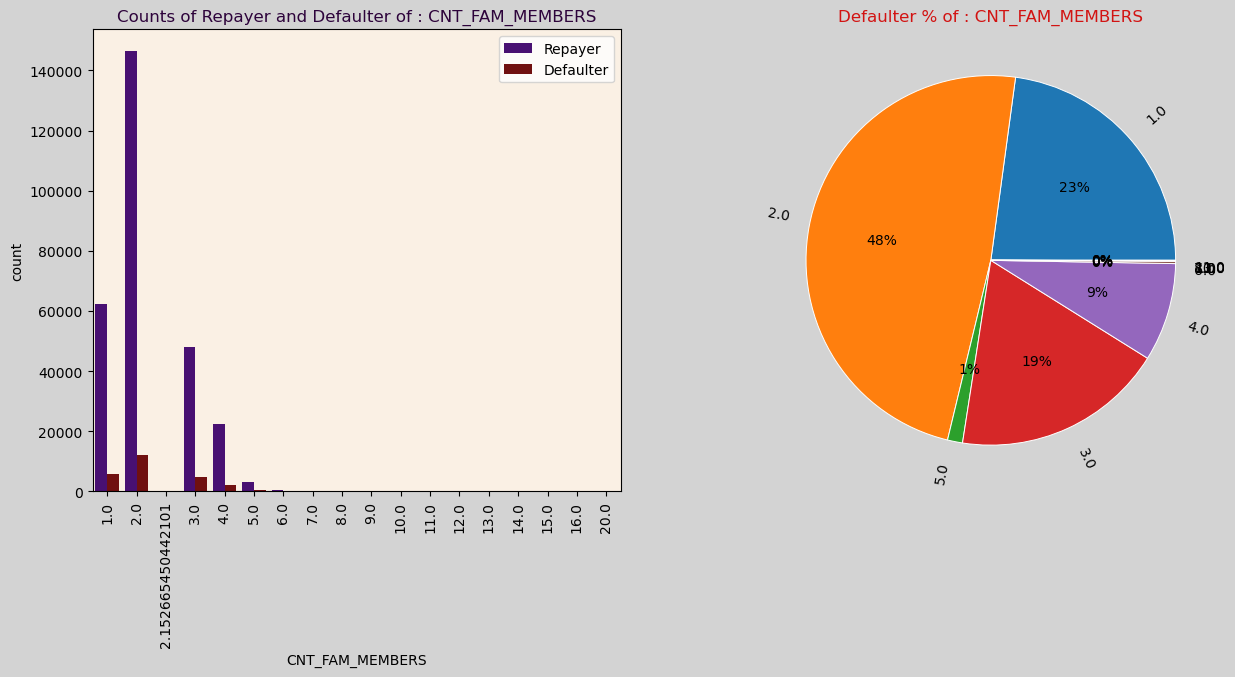

In [132]:
ana_plot('CNT_FAM_MEMBERS')

###### Persons with 2 family members takes more loan and more default rate

#### CNT_CHILDREN

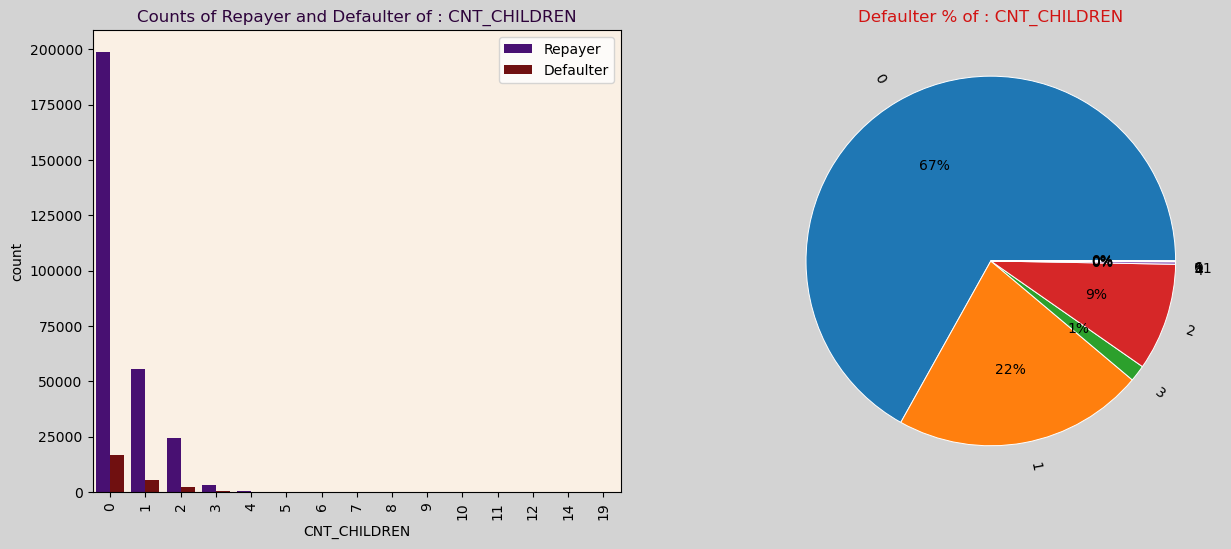

In [133]:
ana_plot('CNT_CHILDREN')

###### Here we got who have no child takes more loan and more default rate , 
###### Before analysis I thought who habe more child takes more loan bur result got quite intersting

#### NAME_FAMILY_STATUS

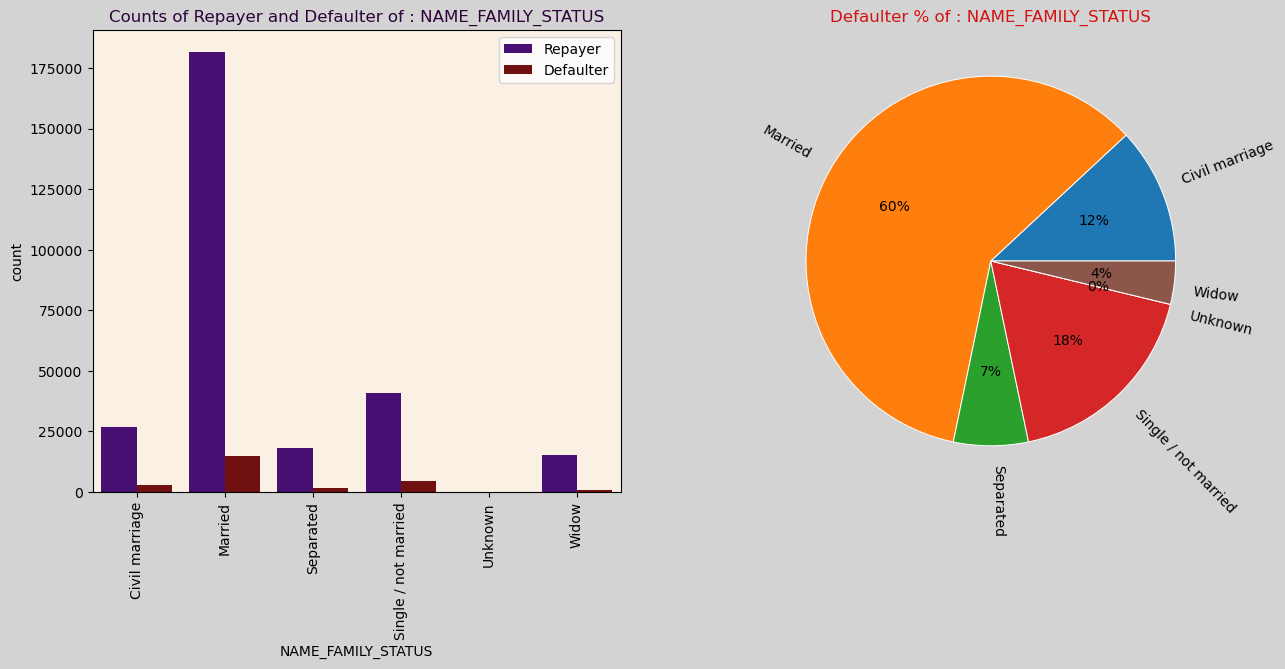

In [134]:
ana_plot('NAME_FAMILY_STATUS')

#### REGION_RATING_CLIENT

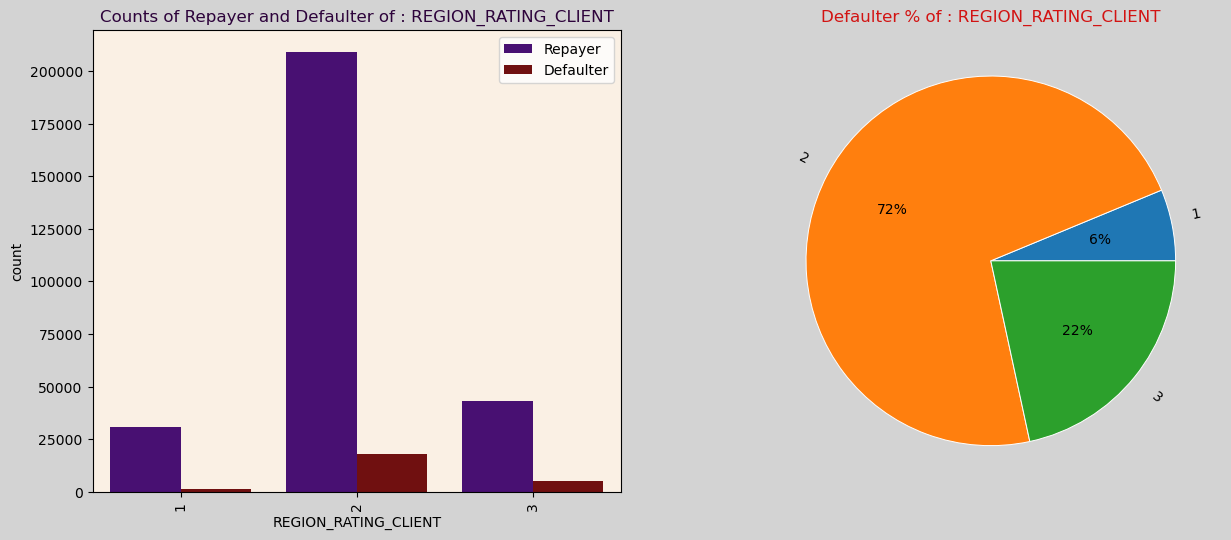

In [135]:
ana_plot('REGION_RATING_CLIENT')

### Plotting Numerical Attributes

In [136]:
def num_plot(col_name):
    
    df = data[[col_name,'TARGET']]
    
    def_df = df[df['TARGET']==1]
    rep_df = df[df['TARGET']==0]
    
    
    sns.distplot(def_df[col_name], hist=False, color='r',label ="Defaulter")
    sns.distplot(rep_df[col_name], hist=False, color='g', label ="Repayer")
    plt.show()

#### AMT_INCOME_TOTAL

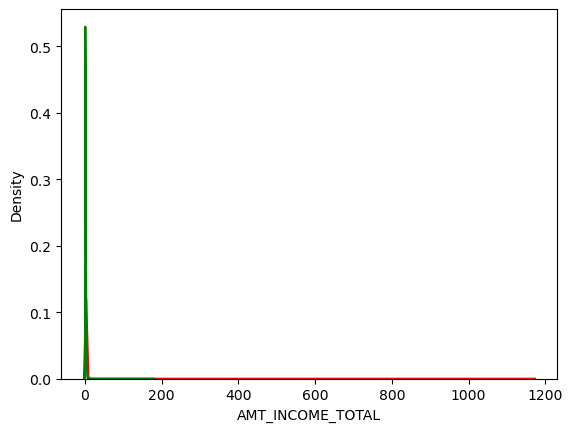

In [137]:
num_plot('AMT_INCOME_TOTAL')

#### AMT_CREDIT

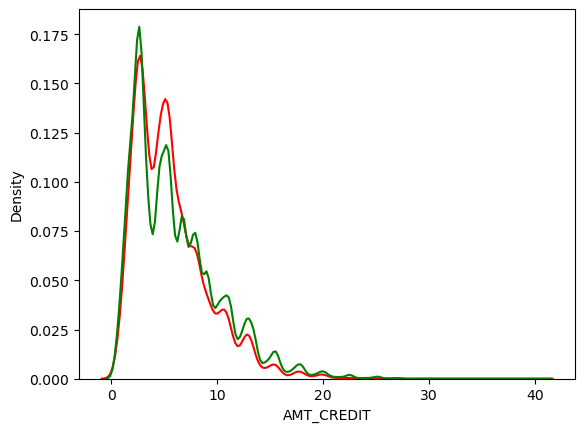

In [138]:
num_plot('AMT_CREDIT')

#### AMT_GOODS_PRICE

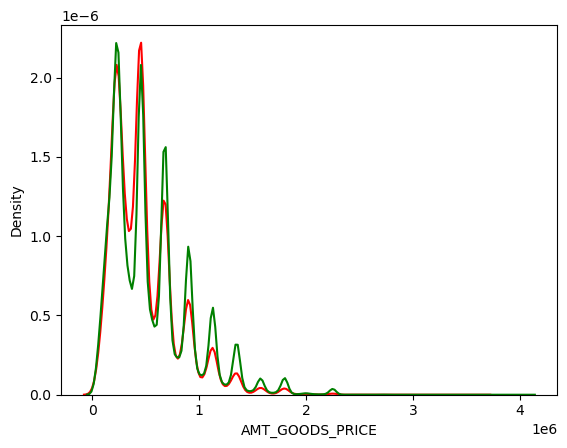

In [139]:
num_plot('AMT_GOODS_PRICE')

### INSIGHTS

1. When the credit amount exceeds 3 million, there is an observed increase in the number of defaulters.

2. Individuals obtaining loans in the range of 300,000 to 600,000 tend to have a higher default rate 
   compared to other credit ranges, suggesting the need for higher interest rates specifically for this credit range.

3. Since the majority (90%) of loan applicants have a total income of less than 300,000, 
   and they exhibit a higher likelihood of defaulting, offering loans to this income category with higher interest rates
   could be considered.

#### SAFER SIDE

1. NAME_EDUCATION_TYPE: Individuals with higher academic degrees exhibit a lower default rate.

2. NAME_INCOME_TYPE: Students and businessmen demonstrate a negligible default rate.

3. REGION_RATING_CLIENT: Clients residing in regions with a RATING 1 are associated with a higher level of safety in terms of      loan defaults.

4. ORGANIZATION_TYPE: Clients engaged in Trade Type 4 and 5 and Industry Type 8 have a default rate of less than 3%.

5. AGE_GROUP: Individuals above the age of 50 are less likely to default on their loans.

6. YEARS_EMPLOYED: Clients with 40+ years of work experience exhibit a default rate of less than 1%.

7. CNT_CHILDREN: Individuals with zero to two children tend to have a higher repayment rate for loans.

#### DEFAULTERS

1. CODE_GENDER: Women tend to have a relatively higher default rate.

2. NAME_FAMILY_STATUS: Individuals who are married, in a civil partnership, or single have a higher likelihood of defaulting.

3. NAME_EDUCATION_TYPE: Individuals with a secondary or secondary special education background are more prone to defaulting.

4. NAME_INCOME_TYPE: Clients who are workers or commercial associates have a higher default rate.

5. REGION_RATING_CLIENT: People residing in regions with a rating of 2 exhibit the highest default rates.

6. ORGANIZATION_TYPE: Business entity type 3 and self-employed individuals have the highest percentage of loans not repaid.

7. AGE_GROUP: It is advisable to be cautious with young individuals in the age group of 20-40 as they have a higher probability of defaulting.

8. YEARS_EMPLOYED: Individuals with less than 5 years of employment experience are more likely to default on their loans.